## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Exploratory Data Analysis - Anadolu Hayat Emeklilik Datathon (May 2022)</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline

# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("train-utf8.csv")

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Overview</p>

In [3]:
df.head()

,POLICY_ID,OFFICE_ID,SIGORTA_TIP,SOZLESME_KOKENI,SOZLESME_KOKENI_DETAY,BASLANGIC_TARIHI,KAPSAM_TIPI,KAPSAM_GRUBU,DAGITIM_KANALI,POLICE_SEHIR,DOGUM_TARIHI,CINSIYET,UYRUK,MEMLEKET,MESLEK,MESLEK_KIRILIM,MUSTERI_SEGMENTI,YATIRIM_KARAKTERI,MEDENI_HAL,EGITIM_DURUM,GELIR,COCUK_SAYISI,OCAK_ODENEN_TUTAR,OCAK_VADE_TUTARI,SUBAT_ODENEN_TU,SUBAT_VADE_TUTARI,MART_ODENEN_TUTAR,MART_VADE_TUTARI,NISAN_ODENEN_TUTAR,NISAN_VADE_TUTARI,MAYIS_ODENEN_TUTAR,MAYIS_VADE_TUTARI,HAZIRAN_ODENEN_TUTAR,HAZIRAN_VADE_TUTARI,TEMMUZ_ODENEN_TUTAR,TEMMUZ_VADE_TUTARI,AGUSTOS_ODENEN_TUTAR,AGUSTOS_VADE_TUTARI,EYLUL_ODENEN_TUTAR,EYLUL_VADE_TUTARI,EKIM_ODENEN_TUTAR,EKIM_VADE_TUTARI,KASIM_ODENEN_TUTAR,KASIM_VADE_TUTARI,ARALIK_ODENEN_TUTAR,ARALIK_VADE_TUTARI,SENE_BASI_HESAP_DEGERI,SENE_SONU_HESAP_DEGERI,ARTIS_DURUMU
0,7203428,10099,7,NEW,NEW,2014-04,PENSION318,STD BİREYSEL,Kanal7,ESKİŞEHİR,1964,2,TR,1,SEKT032,OCCU011,102.000,NaN,Single,Lisans,2500,2.000,220,220.000,220,220.000,220,220.000,220,220.000,220,220.000,220,220.000,220,220.000,220,220.000,220,220.000,220,220.000,220,220.000,220,220.000,15248.750,25684.250,0
1,2857821,10100,7,NEW,NEW,2016-09,PENSION419,KATILIM STD BİREYSEL,Kanal4 + Kanal2,BALIKESİR,1966,1,TR,1,NaN,NaN,103.000,NaN,Married,NaN,0,0.000,160,160.000,160,160.000,160,160.000,160,160.000,160,160.000,160,160.000,160,160.000,160,160.000,160,160.000,160,160.000,160,160.000,160,160.000,5842.710,10104.560,0
2,7833031,10042,1,NEW,NEW,2016-07,PENSION250,EV HANIMI,Kanal4 + Kanal2,BALIKESİR,1956,2,TR,1,NaN,NaN,106.000,NaN,Married,NaN,0,0.000,280,280.000,256,256.000,256,256.000,256,256.000,256,256.000,256,256.000,256,256.000,256,256.000,256,256.000,256,256.000,256,256.000,256,256.000,3782.860,7060.940,0
3,4474944,10056,7,NEW,NEW,2014-09,PENSION434,KATILIM GRUP,Kanal4 + Kanal2,SAMSUN,1977,2,TR,1,SEKT032,OCCU039,102.000,NaN,Married,Lisans,2500,0.000,130,130.000,150,150.000,150,150.000,150,150.000,150,150.000,150,150.000,150,150.000,150,150.000,150,150.000,150,150.000,150,150.000,150,150.000,6855.030,12645.250,0
4,4660085,10068,7,NEW,NEW,2008-04,PENSION100,STD GRUP,Kanal4 + Kanal2,İSTANBUL,1962,2,TR,1,SEKT010,OCCU059,102.000,NaN,Married,Lisans,5000,0.000,100,100.000,100,100.000,100,100.000,100,100.000,100,100.000,100,100.000,100,100.000,100,100.000,100,100.000,100,100.000,100,100.000,100,100.000,27837.750,31613.070,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634112 entries, 0 to 634111
Data columns (total 49 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   POLICY_ID               634112 non-null  int64  
 1   OFFICE_ID               634112 non-null  int64  
 2   SIGORTA_TIP             634112 non-null  int64  
 3   SOZLESME_KOKENI         634112 non-null  object 
 4   SOZLESME_KOKENI_DETAY   627896 non-null  object 
 5   BASLANGIC_TARIHI        634112 non-null  object 
 6   KAPSAM_TIPI             634112 non-null  object 
 7   KAPSAM_GRUBU            634112 non-null  object 
 8   DAGITIM_KANALI          634106 non-null  object 
 9   POLICE_SEHIR            632176 non-null  object 
 10  DOGUM_TARIHI            634112 non-null  int64  
 11  CINSIYET                634112 non-null  int64  
 12  UYRUK                   634001 non-null  object 
 13  MEMLEKET                634112 non-null  int64  
 14  MESLEK              

In [5]:
df.isnull().sum()

POLICY_ID                      0
OFFICE_ID                      0
SIGORTA_TIP                    0
SOZLESME_KOKENI                0
SOZLESME_KOKENI_DETAY       6216
BASLANGIC_TARIHI               0
KAPSAM_TIPI                    0
KAPSAM_GRUBU                   0
DAGITIM_KANALI                 6
POLICE_SEHIR                1936
DOGUM_TARIHI                   0
CINSIYET                       0
UYRUK                        111
MEMLEKET                       0
MESLEK                     66860
MESLEK_KIRILIM             69138
MUSTERI_SEGMENTI               3
YATIRIM_KARAKTERI         558253
MEDENI_HAL                  3199
EGITIM_DURUM              149795
GELIR                      77644
COCUK_SAYISI              118108
OCAK_ODENEN_TUTAR              0
OCAK_VADE_TUTARI               0
SUBAT_ODENEN_TU                0
SUBAT_VADE_TUTARI              0
MART_ODENEN_TUTAR              0
MART_VADE_TUTARI               0
NISAN_ODENEN_TUTAR             0
NISAN_VADE_TUTARI              0
MAYIS_ODEN

In [6]:
df.isnull().sum() / df.shape[0] * 100

POLICY_ID                 0.000
OFFICE_ID                 0.000
SIGORTA_TIP               0.000
SOZLESME_KOKENI           0.000
SOZLESME_KOKENI_DETAY     0.980
BASLANGIC_TARIHI          0.000
KAPSAM_TIPI               0.000
KAPSAM_GRUBU              0.000
DAGITIM_KANALI            0.001
POLICE_SEHIR              0.305
DOGUM_TARIHI              0.000
CINSIYET                  0.000
UYRUK                     0.018
MEMLEKET                  0.000
MESLEK                   10.544
MESLEK_KIRILIM           10.903
MUSTERI_SEGMENTI          0.000
YATIRIM_KARAKTERI        88.037
MEDENI_HAL                0.504
EGITIM_DURUM             23.623
GELIR                    12.245
COCUK_SAYISI             18.626
OCAK_ODENEN_TUTAR         0.000
OCAK_VADE_TUTARI          0.000
SUBAT_ODENEN_TU           0.000
SUBAT_VADE_TUTARI         0.000
MART_ODENEN_TUTAR         0.000
MART_VADE_TUTARI          0.000
NISAN_ODENEN_TUTAR        0.000
NISAN_VADE_TUTARI         0.000
MAYIS_ODENEN_TUTAR        0.000
MAYIS_VA

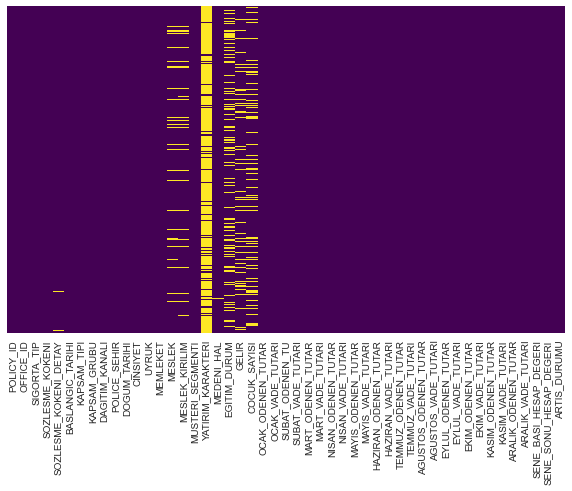

In [7]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
POLICY_ID,634112.000,5494077.698,2591409.363,1000050.000,3247899.250,5497920.000,7739649.750,9989995.000
OFFICE_ID,634112.000,10331.389,394.587,10000.000,10006.000,10152.000,10556.000,11756.000
SIGORTA_TIP,634112.000,2.537,2.600,1.000,1.000,1.000,6.000,8.000
DOGUM_TARIHI,634112.000,1977.636,11.090,1921.000,1970.000,1978.000,1986.000,2004.000
CINSIYET,634112.000,1.513,0.500,1.000,1.000,2.000,2.000,2.000
MEMLEKET,634112.000,1.007,0.106,1.000,1.000,1.000,1.000,3.000
MUSTERI_SEGMENTI,634109.000,104.382,1.521,101.000,103.000,105.000,106.000,106.000
COCUK_SAYISI,516004.000,0.104,0.476,0.000,0.000,0.000,0.000,20.000
OCAK_ODENEN_TUTAR,634112.000,204.457,341.239,0.000,0.000,160.000,270.000,20000.000
OCAK_VADE_TUTARI,634112.000,314.881,524.090,17.000,170.000,228.000,340.000,300000.000


In [9]:
df.describe(include="O").T

,count,unique,top,freq
SOZLESME_KOKENI,634112,5,NEW,620214
SOZLESME_KOKENI_DETAY,627896,10,NEW,612898
BASLANGIC_TARIHI,634112,195,2019-12,11509
KAPSAM_TIPI,634112,239,PENSION247,66416
KAPSAM_GRUBU,634112,10,GRUPLANMAMIŞ,359968
DAGITIM_KANALI,634106,20,Kanal4 + Kanal2,456132
POLICE_SEHIR,632176,603,İSTANBUL,144353
UYRUK,634001,80,TR,630849
MESLEK,567252,32,SEKT032,309717
MESLEK_KIRILIM,564974,87,OCCU074,113354


In [10]:
object_col = df.select_dtypes(include='object').columns
object_col

Index(['SOZLESME_KOKENI', 'SOZLESME_KOKENI_DETAY', 'BASLANGIC_TARIHI',
       'KAPSAM_TIPI', 'KAPSAM_GRUBU', 'DAGITIM_KANALI', 'POLICE_SEHIR',
       'UYRUK', 'MESLEK', 'MESLEK_KIRILIM', 'YATIRIM_KARAKTERI', 'MEDENI_HAL',
       'EGITIM_DURUM', 'GELIR'],
      dtype='object')

In [11]:
for col in object_col:
    print(col)
    print("--"*8)
    print(df[col].value_counts(dropna=False))
    print("--"*20)

SOZLESME_KOKENI
----------------
NEW         620214
TRANS_C      12373
TRANS_L        808
TRANS_TF       716
TRANS            1
Name: SOZLESME_KOKENI, dtype: int64
----------------------------------------
SOZLESME_KOKENI_DETAY
----------------
NEW          612898
TRANS         10740
NaN            6216
TRANS_TR       2253
NEW_MRG        1625
INV_PROC        299
TRANS_MRG        48
NEW_TR           17
TRANS_T2         10
TR_T2_TR          5
TRANS_C           1
Name: SOZLESME_KOKENI_DETAY, dtype: int64
----------------------------------------
BASLANGIC_TARIHI
----------------
2019-12    11509
2015-12     9840
2015-07     8017
2015-06     7656
2016-01     7619
           ...  
2004-01      205
2004-04      203
2004-02      173
2003-11       87
2003-10       14
Name: BASLANGIC_TARIHI, Length: 195, dtype: int64
----------------------------------------
KAPSAM_TIPI
----------------
PENSION247    66416
PENSION215    57983
PENSION251    52236
PENSION001    46419
PENSION059    45527
            

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">The Detailed Examination of Data Column by Column</p>

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">SIGORTA_TIP</p>

**SIGORTA_TIP**: Ürünlerin tipini verir:

    1: Ferdi BES
    4: Vasa Ferdi BES : Vakıf Sandık Bireysel Emeklilik Sistemi
    6: IGES : İşveren Grup Emeklilik Sistemi
    7: GBBES : Gruba Bağlı Bireysel Emeklilik Sistemi
    8: OKS : Otomatik Katılım Sistemi

In [12]:
df.SIGORTA_TIP.value_counts()

1    469399
7    150678
6     12415
8       873
4       747
Name: SIGORTA_TIP, dtype: int64

In [13]:
df.SIGORTA_TIP.isnull().sum()

0

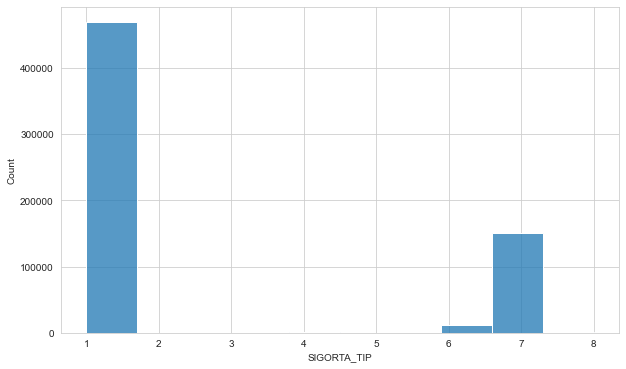

In [14]:
sns.histplot(x="SIGORTA_TIP", data=df, kde=False, bins=10);

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">SOZLESME_KOKENI</p>

**SOZLESME_KOKENI**: Sözleşmenin yeni sözleşme mi yoksa aktarım yapılmış sözleşme mi olduğu bilgisini verir.

    NEW: Yeni Sözleşme
    TRANS_L: Hayat poliçesinden aktarım.
    TRANS_C: Başka şirketten aktarım.
    TRANS : Kullanıcı tarafından hatalı giriş olan kayıtlar, TRANS değerini TRANS_C olarak düşünebilirsiniz.
    TRANS_TF: Güven fonundan aktarım.

In [15]:
df.SOZLESME_KOKENI.value_counts()

NEW         620214
TRANS_C      12373
TRANS_L        808
TRANS_TF       716
TRANS            1
Name: SOZLESME_KOKENI, dtype: int64

In [16]:
df.SOZLESME_KOKENI.isnull().sum()

0

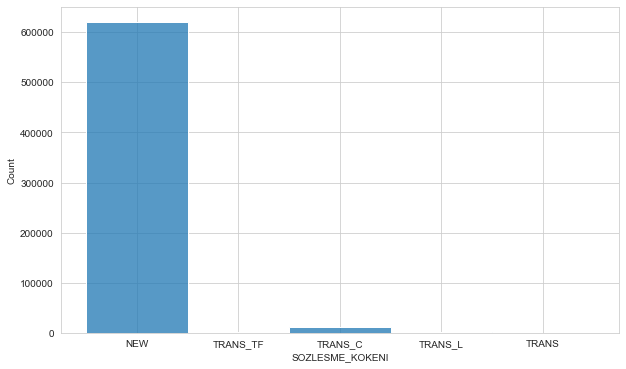

In [17]:
sns.histplot(x="SOZLESME_KOKENI", data=df, bins=5);

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">SOZLESME_DETAY_KOKENI</p>
**SOZLESME_DETAY_KOKENI**:Sözleşmenin kökeninin detay bilgisini verir.

    NEW_MRG: Sözleşme üzerinde Birleştirme Yapılmış.
    NEW_TR: Şirket İçinden Aktarılmış.
    NEW: Yeni sözleşme
    TRANS_MRG: Sözleşme üzerinde Birleştirme Yapılmış.
    TRANS_T2: Farklı Şirketten Üzerine Aktarım Yapılmış.
    TRANS_TR: Farklı Şirketten Aktarılmış.
    TRANS: Transfer yoluyla gelen sözleşme.
    TRANS_C: Farklı şirketten aktarılmış.
    TR_T2_MRG: Sözleşme üzerinde Birleştirme Yapılmış.
    TR_T2_TR: Üzerine Aktarım Yapılmış.
    INV_PROC: Sözleşme kökeni bulunamadığında atanan değer, NEW olarak düşünülebilir.

In [18]:
df.SOZLESME_KOKENI_DETAY.value_counts()

NEW          612898
TRANS         10740
TRANS_TR       2253
NEW_MRG        1625
INV_PROC        299
TRANS_MRG        48
NEW_TR           17
TRANS_T2         10
TR_T2_TR          5
TRANS_C           1
Name: SOZLESME_KOKENI_DETAY, dtype: int64

In [19]:
df.SOZLESME_KOKENI_DETAY.isnull().sum()

6216

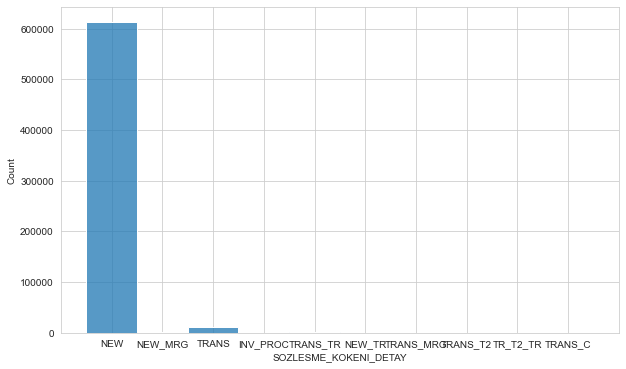

In [20]:
sns.histplot(x="SOZLESME_KOKENI_DETAY", data=df, bins=5);

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">BASLANGIC_TARIHI</p>
**BASLANGIC_TARIHI**: Sözleşmenin başlangıç tarihini verir.

In [21]:
df.BASLANGIC_TARIHI.value_counts()

2019-12    11509
2015-12     9840
2015-07     8017
2015-06     7656
2016-01     7619
           ...  
2004-01      205
2004-04      203
2004-02      173
2003-11       87
2003-10       14
Name: BASLANGIC_TARIHI, Length: 195, dtype: int64

In [22]:
pd.to_datetime(df.BASLANGIC_TARIHI)

0        2014-04-01
1        2016-09-01
2        2016-07-01
3        2014-09-01
4        2008-04-01
            ...    
634107   2012-04-01
634108   2014-10-01
634109   2013-03-01
634110   2014-05-01
634111   2014-12-01
Name: BASLANGIC_TARIHI, Length: 634112, dtype: datetime64[ns]

In [23]:
df.BASLANGIC_TARIHI.isnull().sum()

0

In [ ]:
sns.histplot(x="BASLANGIC_TARIHI", data=df, bins=10);

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">KAPSAM_TIPI</p>
**KAPSAM_TIPI**: Sözleşmenin ait olduğu ürün planını verir.

In [ ]:
df.KAPSAM_TIPI.value_counts()

In [ ]:
df.KAPSAM_TIPI.isnull().sum()

In [ ]:
sns.histplot(x="KAPSAM_TIPI", data=df, bins=100);

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">KAPSAM_GRUBU</p>
**KAPSAM_GRUBU**: Sözleşmenin ürün planının dahil olduğu grup.

In [ ]:
df.KAPSAM_GRUBU.value_counts()

In [ ]:
df[(df.GELIR == '0') & (df.KAPSAM_GRUBU == "EV HANIMI")]

In [ ]:
df.KAPSAM_GRUBU.isnull().sum()

In [ ]:
sns.histplot(x="KAPSAM_GRUBU", data=df);

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">DAGITIM_KANALI</p>
**DAGITIM_KANALI**: Sözleşmenin satışının yapıldığı kanalın ismi.

In [ ]:
df.DAGITIM_KANALI.value_counts()

In [ ]:
df.DAGITIM_KANALI.isnull().sum()

In [ ]:
sns.histplot(x="DAGITIM_KANALI", data=df);

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">POLICE_SEHIR</p>
**POLICE_SEHIR**: Sözleşmenin son faturasının gittiği adrese ait şehir.

In [ ]:
df.POLICE_SEHIR.value_counts()

In [ ]:
df.POLICE_SEHIR.isnull().sum()

In [ ]:
sns.histplot(x="POLICE_SEHIR", data=df, bins=5);

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">DOGUM_TARIHI</p>
**DOGUM_TARIHI**: Sözleşme sahibinin doğum yılı.

In [ ]:
df.DOGUM_TARIHI.value_counts()

In [ ]:
df.DOGUM_TARIHI.isnull().sum()

In [ ]:
sns.histplot(x="DOGUM_TARIHI", data=df);

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">CINSIYET</p>

**CINSIYET**: Sözleşme sahibinin cinsiyeti.

    1: Erkek
    2: Kadın
    0: Tüzel

In [ ]:
df.CINSIYET.value_counts()

In [ ]:
df.CINSIYET.isnull().sum()

In [ ]:
sns.histplot(x="CINSIYET", data=df);

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">UYRUK</p>
**UYRUK**: Sözleşme sahibinin uyruğuna ait olan ülkenin iki harfli ülke kodu.

In [ ]:
df.UYRUK.value_counts()

In [ ]:
df.UYRUK.isnull().sum()

In [ ]:
sns.histplot(x="UYRUK", data=df);

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">MEMLEKET</p>
**MEMLEKET**: Sözleşme sahibinin kimlik tipi:

    1 : TR
    2 : Mavi kart
    3 : Yurtdışı

In [ ]:
df.MEMLEKET.value_counts()

In [ ]:
df.MEMLEKET.isnull().sum()

In [ ]:
sns.histplot(df.MEMLEKET);

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">MESLEK</p>
**MESLEK**: Sözleşme sahibinin mesleğinin ait olduğu sektörün kodu.

In [ ]:
df.MESLEK.value_counts()

In [ ]:
df.MESLEK.isnull().sum()

In [ ]:
sns.histplot(df.MESLEK);

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">MESLEK KIRILIM</p>

**MESLEK KIRILIM** : Sözleşme sahibinin mesleğini belirten kod.

In [ ]:
df.MESLEK_KIRILIM.value_counts()

In [ ]:
df.MESLEK_KIRILIM.isnull().sum()

In [ ]:
sns.histplot(df.MESLEK_KIRILIM);

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">MUSTERI_SEGMENTI</p>

MUSTERI_SEGMENTI: Sözleşme sahibinin müşteri segmenti.

    101: A segment
    102: B segment
    103: C segment
    104: D segment
    105: E segment
    106: F segment

In [ ]:
df.MUSTERI_SEGMENTI.value_counts()

In [ ]:
df.MUSTERI_SEGMENTI.isnull().sum()

In [ ]:
sns.histplot(df.MUSTERI_SEGMENTI);

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">YATIRIM_KARAKTERI</p>

**YATIRIM_KARAKTERI**: Anketi cevaplamayı kabul eden Sözleşme sahiplerine ait atanmış yatırım karakteri bilgisi.

In [ ]:
df.YATIRIM_KARAKTERI.value_counts()

In [ ]:
df.YATIRIM_KARAKTERI.isnull().sum()

In [ ]:
sns.histplot(df.YATIRIM_KARAKTERI);

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">EGITIM_DURUM</p>

**EGITIM_DURUM**: Anketi cevaplamayı kabul eden Sözleşme sahiplerinin eğitim durumu.

In [ ]:
df.EGITIM_DURUM.value_counts()

In [ ]:
df.EGITIM_DURUM.isnull().sum()

In [ ]:
sns.histplot(df.EGITIM_DURUM);

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">GELIR</p>

**GELIR**: Anketi cevaplamayı kabul eden Sözleşme sahiplerinin belirttiği aylık gelir bilgisi.

In [ ]:
df.GELIR.value_counts()

In [ ]:
df.GELIR.isnull().sum()

In [ ]:
sns.histplot(df.GELIR);

In [ ]:
sns.boxplot(data=df, x="GELIR");

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">COCUK_SAYISI</p>

**COCUK_SAYISI**: Anketi cevaplamayı kabul eden Sözleşme sahiplerinin çocuk sayısı.

In [ ]:
df.COCUK_SAYISI.value_counts()

In [ ]:
df.COCUK_SAYISI.isnull().sum()

In [ ]:
sns.histplot(df.COCUK_SAYISI);

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">SENE_BASI_HESAP_DEGERI</p>

**SENE_BASI_HESAP_DEGERI**: 2020 senesinin başına ait biriken toplam para miktarı.

In [ ]:
df.SENE_BASI_HESAP_DEGERI.value_counts()

In [ ]:
df.SENE_BASI_HESAP_DEGERI.isnull().sum()

In [ ]:
sns.histplot(df.SENE_BASI_HESAP_DEGERI);

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">SENE_SONU_HESAP_DEGERI</p>

**SENE_SONU_HESAP_DEGERI**: 2020 senesinin başına ait biriken toplam para miktarı.

In [ ]:
df.SENE_SONU_HESAP_DEGERI.value_counts()

In [ ]:
df.SENE_SONU_HESAP_DEGERI.isnull().sum()

In [ ]:
sns.histplot(df.SENE_SONU_HESAP_DEGERI);

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">ARTIS_DURUMU</p>

**ARTIS_DURUMU**: Yıl sonundan sonraki çeyrekte (2021 ilk çeyreği) vade tutarında artış yapılıp yapılmadığını belirten sınıf bilgisi.

In [ ]:
df.ARTIS_DURUMU.value_counts()

In [ ]:
df.ARTIS_DURUMU.isnull().sum()

In [ ]:
sns.histplot(df.ARTIS_DURUMU);

In [ ]:
len(df[df.ARTIS_DURUMU == 0])

In [ ]:
len(df[df.ARTIS_DURUMU == 1])

In [ ]:
len(df)

In [ ]:
len(df[df.ARTIS_DURUMU == 1]) / len(df)

In [ ]:
len(df[df.ARTIS_DURUMU == 0]) / len(df)

**91,3%** of the customers didn't increase payment amount.
Only **8,7%** of the customers increased it.

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">ODEMELER</p>

In [4]:
df[df.OCAK_ODENEN_TUTAR != df.OCAK_VADE_TUTARI]

,POLICY_ID,OFFICE_ID,SIGORTA_TIP,SOZLESME_KOKENI,SOZLESME_KOKENI_DETAY,BASLANGIC_TARIHI,KAPSAM_TIPI,KAPSAM_GRUBU,DAGITIM_KANALI,POLICE_SEHIR,DOGUM_TARIHI,CINSIYET,UYRUK,MEMLEKET,MESLEK,MESLEK_KIRILIM,MUSTERI_SEGMENTI,YATIRIM_KARAKTERI,MEDENI_HAL,EGITIM_DURUM,GELIR,COCUK_SAYISI,OCAK_ODENEN_TUTAR,OCAK_VADE_TUTARI,SUBAT_ODENEN_TU,SUBAT_VADE_TUTARI,MART_ODENEN_TUTAR,MART_VADE_TUTARI,NISAN_ODENEN_TUTAR,NISAN_VADE_TUTARI,MAYIS_ODENEN_TUTAR,MAYIS_VADE_TUTARI,HAZIRAN_ODENEN_TUTAR,HAZIRAN_VADE_TUTARI,TEMMUZ_ODENEN_TUTAR,TEMMUZ_VADE_TUTARI,AGUSTOS_ODENEN_TUTAR,AGUSTOS_VADE_TUTARI,EYLUL_ODENEN_TUTAR,EYLUL_VADE_TUTARI,EKIM_ODENEN_TUTAR,EKIM_VADE_TUTARI,KASIM_ODENEN_TUTAR,KASIM_VADE_TUTARI,ARALIK_ODENEN_TUTAR,ARALIK_VADE_TUTARI,SENE_BASI_HESAP_DEGERI,SENE_SONU_HESAP_DEGERI,ARTIS_DURUMU
6,8167943,10006,8,NEW,NEW,2018-12,PENSION329,OKS,Kanal4 + Kanal2,İSTANBUL,1993,1,TR,1,NaN,NaN,102.000,NaN,Single,NaN,NaN,0.000,0,120.000,0,120.000,0,120.000,0,120.000,0,120.000,0,120.000,0,120.000,0,120.000,0,120.000,0,120.000,0,120.000,0,120.000,407.260,462.370,0
9,1127870,10230,6,NEW,NEW,2016-02,PENSION028,STD GRUP,Kanal4 + Kanal2,ANKARA,1993,1,TR,1,SEKT032,OCCU006,106.000,NaN,Single,Lise,0,0.000,0,97.000,0,97.000,0,97.000,0,97.000,0,97.000,0,97.000,0,97.000,0,97.000,0,97.000,0,97.000,0,97.000,0,97.000,501.960,519.720,0
10,8216966,10232,7,NEW,NEW,2015-08,PENSION223,GRUP,Kanal4 + Kanal2,BALIKESİR,1987,2,TR,1,SEKT032,OCCU006,103.000,NaN,Married,NaN,1500,0.000,0,60.000,0,60.000,0,60.000,0,60.000,0,60.000,0,60.000,0,60.000,0,60.000,0,60.000,0,60.000,0,60.000,0,60.000,127.940,142.980,0
13,8691355,10129,1,NEW,NEW,2006-03,PENSION056,EV HANIMI,Kanal4 + Kanal2,İZMİR,1981,2,TR,1,SEKT010,OCCU037,106.000,NaN,Married,Lise,0,0.000,0,130.000,0,130.000,0,130.000,0,130.000,0,130.000,0,130.000,0,130.000,0,130.000,0,130.000,0,130.000,0,130.000,0,130.000,0.000,0.000,1
21,1075630,10375,6,NEW,NEW,2011-06,PENSION126,STD GRUP,Kanal4 + Kanal2,ANKARA,1974,1,TR,1,SEKT032,OCCU013,106.000,NaN,Single,Lisans,10000,0.000,0,97.000,0,97.000,0,97.000,0,97.000,0,97.000,0,97.000,0,97.000,0,97.000,0,97.000,0,97.000,0,97.000,0,97.000,1045.770,1280.980,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634105,9822641,11274,1,NEW,NEW,2009-04,PENSION001,GRUPLANMAMIŞ,Kanal4 + Kanal2,İSTANBUL,1977,1,TR,1,SEKT032,OCCU074,106.000,NaN,Married,NaN,1500,0.000,0,340.000,0,340.000,0,340.000,0,340.000,0,340.000,0,340.000,0,340.000,0,340.000,0,340.000,0,340.000,0,340.000,0,340.000,142.070,152.250,0
634106,8588248,10029,1,NEW,NEW,2012-12,PENSION001,GRUPLANMAMIŞ,Kanal1 + Kanal2,MANİSA,1952,1,TR,1,SEKT032,OCCU004,106.000,NaN,Single,Lise,2000,0.000,0,340.000,0,340.000,0,340.000,0,340.000,0,340.000,0,340.000,0,340.000,0,340.000,0,340.000,0,340.000,0,340.000,0,340.000,3355.900,4126.280,0
634109,4285594,11422,1,NEW,NEW,2013-03,PENSION195,GRUPLANMAMIŞ,Kanal4 + Kanal2,TRABZON,1966,2,TR,1,SEKT032,OCCU037,103.000,NaN,Married,Lise,3000,0.000,0,287.000,0,287.000,0,287.000,0,287.000,0,287.000,0,287.000,0,287.000,0,287.000,0,287.000,0,287.000,0,287.000,0,287.000,20958.770,23038.390,0
634110,5443282,10348,1,NEW,NEW,2014-05,PENSION215,GRUPLANMAMIŞ,Kanal4 + Kanal2,MERSİN,1988,2,TR,1,SEKT032,OCCU074,106.000,NaN,Single,NaN,2000,0.000,0,170.000,0,170.000,0,170.000,0,170.000,0,170.000,0,170.000,0,170.000,0,170.000,0,170.000,0,170.000,0,170.000,0,170.000,122.630,133.850,0


In [7]:
df[df.OCAK_ODENEN_TUTAR > df.OCAK_VADE_TUTARI]

,POLICY_ID,OFFICE_ID,SIGORTA_TIP,SOZLESME_KOKENI,SOZLESME_KOKENI_DETAY,BASLANGIC_TARIHI,KAPSAM_TIPI,KAPSAM_GRUBU,DAGITIM_KANALI,POLICE_SEHIR,DOGUM_TARIHI,CINSIYET,UYRUK,MEMLEKET,MESLEK,MESLEK_KIRILIM,MUSTERI_SEGMENTI,YATIRIM_KARAKTERI,MEDENI_HAL,EGITIM_DURUM,GELIR,COCUK_SAYISI,OCAK_ODENEN_TUTAR,OCAK_VADE_TUTARI,SUBAT_ODENEN_TU,SUBAT_VADE_TUTARI,MART_ODENEN_TUTAR,MART_VADE_TUTARI,NISAN_ODENEN_TUTAR,NISAN_VADE_TUTARI,MAYIS_ODENEN_TUTAR,MAYIS_VADE_TUTARI,HAZIRAN_ODENEN_TUTAR,HAZIRAN_VADE_TUTARI,TEMMUZ_ODENEN_TUTAR,TEMMUZ_VADE_TUTARI,AGUSTOS_ODENEN_TUTAR,AGUSTOS_VADE_TUTARI,EYLUL_ODENEN_TUTAR,EYLUL_VADE_TUTARI,EKIM_ODENEN_TUTAR,EKIM_VADE_TUTARI,KASIM_ODENEN_TUTAR,KASIM_VADE_TUTARI,ARALIK_ODENEN_TUTAR,ARALIK_VADE_TUTARI,SENE_BASI_HESAP_DEGERI,SENE_SONU_HESAP_DEGERI,ARTIS_DURUMU
29,2506431,10085,6,NEW,NEW,2019-12,PENSION276,GRUPLANMAMIŞ,Kanal3,İSTANBUL,1973,1,TR,1,SEKT007,OCCU031,102.000,NaN,Married,Lisans,NaN,0.000,347,346.640,347,346.640,347,346.640,399,399.420,399,399.420,399,399.420,399,399.420,399,399.420,399,399.420,399,399.420,399,399.420,399,399.420,345.470,6603.390,1
47,9781203,10022,6,NEW,NEW,2009-09,PENSION100,STD GRUP,Kanal2,ANKARA,1981,1,TR,1,SEKT032,OCCU013,102.000,Cesur,Married,Lisans,0,0.000,135,134.550,135,134.550,151,150.700,151,150.700,151,150.700,151,150.700,151,150.700,151,150.700,151,150.700,151,150.700,151,150.700,151,150.700,18773.570,28786.230,1
51,4514283,10023,6,NEW,NEW,2009-07,PENSION100,STD GRUP,Kanal3,İSTANBUL,1981,2,NaN,1,NaN,NaN,102.000,Bilge,Married,Önlisans,0,0.000,271,270.550,271,270.550,271,270.550,313,312.690,313,312.690,313,312.690,313,312.690,313,312.690,313,312.690,313,312.690,313,312.690,313,312.690,22437.710,29894.600,1
69,3046886,10023,6,NEW,NaN,2018-01,PENSION359,İGES STD GRUP,Kanal3 + Kanal1,KOCAELİ,1990,2,TR,1,NaN,OCCU074,102.000,Cesur,Married,(Diğer),NaN,0.000,110,109.580,110,109.580,110,109.580,110,109.580,110,109.580,110,109.580,110,109.580,110,109.580,110,109.580,110,109.580,110,109.580,110,109.580,2681.580,4758.920,1
109,4373677,10240,6,NEW,NEW,2013-05,PENSION357,İGES STD GRUP,Kanal7,İZMİR,1985,1,TR,1,SEKT032,OCCU074,103.000,NaN,Married,Lisans,0,0.000,312,311.850,312,311.850,312,311.850,359,358.630,359,358.630,359,358.630,359,358.630,359,358.630,359,358.630,359,358.630,359,358.630,359,358.630,17176.360,28848.530,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632952,7541772,10023,7,NEW,NEW,2013-11,PENSION100,STD GRUP,Kanal3,İSTANBUL,1980,1,TR,1,SEKT032,OCCU074,102.000,Cesur,Married,(Diğer),0,0.000,423,422.620,423,422.620,581,581.080,475,475.440,475,475.440,475,475.440,475,475.440,475,475.440,475,475.440,475,475.440,475,475.440,475,475.440,29673.780,41328.670,1
633366,7260881,10240,7,NEW,NEW,2013-05,PENSION356,STD BİREYSEL,Kanal7,TEKİRDAĞ,1970,1,TR,1,SEKT032,OCCU074,103.000,NaN,Married,Lise,0,0.000,222,221.710,222,221.710,222,221.710,247,247.080,247,247.080,247,247.080,247,247.080,247,247.080,247,247.080,247,247.080,247,247.080,247,247.080,7981.050,11647.460,1
633406,9316554,10658,7,NEW,NEW,2015-03,PENSION100,STD GRUP,Kanal7,İSTANBUL,1980,2,TR,1,SEKT005,OCCU074,102.000,Dikkatli,Single,Lisans,0,0.000,554,553.500,568,567.830,582,581.640,608,608.000,657,657.230,664,663.840,980,980.190,988,988.480,1046,1046.490,1086,1085.820,1143,1142.780,1146,1146.120,18383.940,32095.880,1
633608,8344223,10240,7,NEW,NEW,2009-10,PENSION320,STD BİREYSEL,Kanal7,ADANA,1977,2,TR,1,SEKT004,OCCU013,102.000,NaN,Single,Lisans,0,0.000,483,482.890,483,482.890,454,454.230,480,480.360,480,480.360,480,480.360,497,496.920,497,496.920,497,496.920,547,546.610,547,546.610,547,546.610,42138.510,52698.990,1


In [8]:
df[(df.OCAK_ODENEN_TUTAR <= df.OCAK_VADE_TUTARI) & (df.OCAK_ODENEN_TUTAR != 0)]

,POLICY_ID,OFFICE_ID,SIGORTA_TIP,SOZLESME_KOKENI,SOZLESME_KOKENI_DETAY,BASLANGIC_TARIHI,KAPSAM_TIPI,KAPSAM_GRUBU,DAGITIM_KANALI,POLICE_SEHIR,DOGUM_TARIHI,CINSIYET,UYRUK,MEMLEKET,MESLEK,MESLEK_KIRILIM,MUSTERI_SEGMENTI,YATIRIM_KARAKTERI,MEDENI_HAL,EGITIM_DURUM,GELIR,COCUK_SAYISI,OCAK_ODENEN_TUTAR,OCAK_VADE_TUTARI,SUBAT_ODENEN_TU,SUBAT_VADE_TUTARI,MART_ODENEN_TUTAR,MART_VADE_TUTARI,NISAN_ODENEN_TUTAR,NISAN_VADE_TUTARI,MAYIS_ODENEN_TUTAR,MAYIS_VADE_TUTARI,HAZIRAN_ODENEN_TUTAR,HAZIRAN_VADE_TUTARI,TEMMUZ_ODENEN_TUTAR,TEMMUZ_VADE_TUTARI,AGUSTOS_ODENEN_TUTAR,AGUSTOS_VADE_TUTARI,EYLUL_ODENEN_TUTAR,EYLUL_VADE_TUTARI,EKIM_ODENEN_TUTAR,EKIM_VADE_TUTARI,KASIM_ODENEN_TUTAR,KASIM_VADE_TUTARI,ARALIK_ODENEN_TUTAR,ARALIK_VADE_TUTARI,SENE_BASI_HESAP_DEGERI,SENE_SONU_HESAP_DEGERI,ARTIS_DURUMU
0,7203428,10099,7,NEW,NEW,2014-04,PENSION318,STD BİREYSEL,Kanal7,ESKİŞEHİR,1964,2,TR,1,SEKT032,OCCU011,102.000,NaN,Single,Lisans,2500,2.000,220,220.000,220,220.000,220,220.000,220,220.000,220,220.000,220,220.000,220,220.000,220,220.000,220,220.000,220,220.000,220,220.000,220,220.000,15248.750,25684.250,0
1,2857821,10100,7,NEW,NEW,2016-09,PENSION419,KATILIM STD BİREYSEL,Kanal4 + Kanal2,BALIKESİR,1966,1,TR,1,NaN,NaN,103.000,NaN,Married,NaN,0,0.000,160,160.000,160,160.000,160,160.000,160,160.000,160,160.000,160,160.000,160,160.000,160,160.000,160,160.000,160,160.000,160,160.000,160,160.000,5842.710,10104.560,0
2,7833031,10042,1,NEW,NEW,2016-07,PENSION250,EV HANIMI,Kanal4 + Kanal2,BALIKESİR,1956,2,TR,1,NaN,NaN,106.000,NaN,Married,NaN,0,0.000,280,280.000,256,256.000,256,256.000,256,256.000,256,256.000,256,256.000,256,256.000,256,256.000,256,256.000,256,256.000,256,256.000,256,256.000,3782.860,7060.940,0
3,4474944,10056,7,NEW,NEW,2014-09,PENSION434,KATILIM GRUP,Kanal4 + Kanal2,SAMSUN,1977,2,TR,1,SEKT032,OCCU039,102.000,NaN,Married,Lisans,2500,0.000,130,130.000,150,150.000,150,150.000,150,150.000,150,150.000,150,150.000,150,150.000,150,150.000,150,150.000,150,150.000,150,150.000,150,150.000,6855.030,12645.250,0
4,4660085,10068,7,NEW,NEW,2008-04,PENSION100,STD GRUP,Kanal4 + Kanal2,İSTANBUL,1962,2,TR,1,SEKT010,OCCU059,102.000,NaN,Married,Lisans,5000,0.000,100,100.000,100,100.000,100,100.000,100,100.000,100,100.000,100,100.000,100,100.000,100,100.000,100,100.000,100,100.000,100,100.000,100,100.000,27837.750,31613.070,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634107,9328578,10773,1,NEW,NEW,2012-04,PENSION056,EV HANIMI,Kanal4 + Kanal2,GAZİANTEP,1979,2,TR,1,SEKT032,OCCU037,104.000,NaN,Married,Önlisans,1000,0.000,480,480.000,480,480.000,480,480.000,480,480.000,480,480.000,480,480.000,480,480.000,480,480.000,480,480.000,480,480.000,480,480.000,480,480.000,31436.260,39605.590,0
634108,1037693,10591,4,TRANS_TF,TRANS,2014-10,PENSION221,GRUPLANMAMIŞ,Kanal1,İSTANBUL,1961,1,TR,1,SEKT032,OCCU030,102.000,NaN,Married,Lisans,0,0.000,95,95.000,95,95.000,95,95.000,95,95.000,95,95.000,95,95.000,95,95.000,95,95.000,95,95.000,95,95.000,95,95.000,95,95.000,798503.140,1045948.580,0
634109,4285594,11422,1,NEW,NEW,2013-03,PENSION195,GRUPLANMAMIŞ,Kanal4 + Kanal2,TRABZON,1966,2,TR,1,SEKT032,OCCU037,103.000,NaN,Married,Lise,3000,0.000,0,287.000,0,287.000,0,287.000,0,287.000,0,287.000,0,287.000,0,287.000,0,287.000,0,287.000,0,287.000,0,287.000,0,287.000,20958.770,23038.390,0
634110,5443282,10348,1,NEW,NEW,2014-05,PENSION215,GRUPLANMAMIŞ,Kanal4 + Kanal2,MERSİN,1988,2,TR,1,SEKT032,OCCU074,106.000,NaN,Single,NaN,2000,0.000,0,170.000,0,170.000,0,170.000,0,170.000,0,170.000,0,170.000,0,170.000,0,170.000,0,170.000,0,170.000,0,170.000,0,170.000,122.630,133.850,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634112 entries, 0 to 634111
Data columns (total 49 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   POLICY_ID               634112 non-null  int64  
 1   OFFICE_ID               634112 non-null  int64  
 2   SIGORTA_TIP             634112 non-null  int64  
 3   SOZLESME_KOKENI         634112 non-null  object 
 4   SOZLESME_KOKENI_DETAY   627896 non-null  object 
 5   BASLANGIC_TARIHI        634112 non-null  object 
 6   KAPSAM_TIPI             634112 non-null  object 
 7   KAPSAM_GRUBU            634112 non-null  object 
 8   DAGITIM_KANALI          634106 non-null  object 
 9   POLICE_SEHIR            632176 non-null  object 
 10  DOGUM_TARIHI            634112 non-null  int64  
 11  CINSIYET                634112 non-null  int64  
 12  UYRUK                   634001 non-null  object 
 13  MEMLEKET                634112 non-null  int64  
 14  MESLEK              

In [19]:
df["OCAK_VADE_TUTARI"] = df["OCAK_VADE_TUTARI"].astype('int64')
df["SUBAT_VADE_TUTARI"] = df["SUBAT_VADE_TUTARI"].astype('int64')
df["MART_VADE_TUTARI"] = df["MART_VADE_TUTARI"].astype('int64')
df["NISAN_VADE_TUTARI"] = df["NISAN_VADE_TUTARI"].astype('int64')
df["MAYIS_VADE_TUTARI"] = df["MAYIS_VADE_TUTARI"].astype('int64')
df["HAZIRAN_VADE_TUTARI"] = df["HAZIRAN_VADE_TUTARI"].astype('int64')
df["TEMMUZ_VADE_TUTARI"] = df["TEMMUZ_VADE_TUTARI"].astype('int64')
df["AGUSTOS_VADE_TUTARI"] = df["AGUSTOS_VADE_TUTARI"].astype('int64')
df["EYLUL_VADE_TUTARI"] = df["EYLUL_VADE_TUTARI"].astype('int64')
df["EKIM_VADE_TUTARI"] = df["EKIM_VADE_TUTARI"].astype('int64')
df["KASIM_VADE_TUTARI"] = df["KASIM_VADE_TUTARI"].astype('int64')
df["ARALIK_VADE_TUTARI"] = df["ARALIK_VADE_TUTARI"].astype('int64')
df["SENE_BASI_HESAP_DEGERI"] = df["SENE_BASI_HESAP_DEGERI"].astype('int64')
df["SENE_SONU_HESAP_DEGERI"] = df["SENE_SONU_HESAP_DEGERI"].astype('int64')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634112 entries, 0 to 634111
Data columns (total 49 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   POLICY_ID               634112 non-null  int64  
 1   OFFICE_ID               634112 non-null  int64  
 2   SIGORTA_TIP             634112 non-null  int64  
 3   SOZLESME_KOKENI         634112 non-null  object 
 4   SOZLESME_KOKENI_DETAY   627896 non-null  object 
 5   BASLANGIC_TARIHI        634112 non-null  object 
 6   KAPSAM_TIPI             634112 non-null  object 
 7   KAPSAM_GRUBU            634112 non-null  object 
 8   DAGITIM_KANALI          634106 non-null  object 
 9   POLICE_SEHIR            632176 non-null  object 
 10  DOGUM_TARIHI            634112 non-null  int64  
 11  CINSIYET                634112 non-null  int64  
 12  UYRUK                   634001 non-null  object 
 13  MEMLEKET                634112 non-null  int64  
 14  MESLEK              

In [22]:
df.sample(15)

,POLICY_ID,OFFICE_ID,SIGORTA_TIP,SOZLESME_KOKENI,SOZLESME_KOKENI_DETAY,BASLANGIC_TARIHI,KAPSAM_TIPI,KAPSAM_GRUBU,DAGITIM_KANALI,POLICE_SEHIR,DOGUM_TARIHI,CINSIYET,UYRUK,MEMLEKET,MESLEK,MESLEK_KIRILIM,MUSTERI_SEGMENTI,YATIRIM_KARAKTERI,MEDENI_HAL,EGITIM_DURUM,GELIR,COCUK_SAYISI,OCAK_ODENEN_TUTAR,OCAK_VADE_TUTARI,SUBAT_ODENEN_TU,SUBAT_VADE_TUTARI,MART_ODENEN_TUTAR,MART_VADE_TUTARI,NISAN_ODENEN_TUTAR,NISAN_VADE_TUTARI,MAYIS_ODENEN_TUTAR,MAYIS_VADE_TUTARI,HAZIRAN_ODENEN_TUTAR,HAZIRAN_VADE_TUTARI,TEMMUZ_ODENEN_TUTAR,TEMMUZ_VADE_TUTARI,AGUSTOS_ODENEN_TUTAR,AGUSTOS_VADE_TUTARI,EYLUL_ODENEN_TUTAR,EYLUL_VADE_TUTARI,EKIM_ODENEN_TUTAR,EKIM_VADE_TUTARI,KASIM_ODENEN_TUTAR,KASIM_VADE_TUTARI,ARALIK_ODENEN_TUTAR,ARALIK_VADE_TUTARI,SENE_BASI_HESAP_DEGERI,SENE_SONU_HESAP_DEGERI,ARTIS_DURUMU
535577,8755780,10006,1,NEW,NEW,2017-04,PENSION251,GRUPLANMAMIŞ,Kanal4 + Kanal2,ANKARA,1954,1,TR,1,SEKT010,OCCU072,104.000,NaN,Married,(Diğer),3000,0.000,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,9377,13681,0
179184,3966575,10029,7,NEW,NEW,2014-12,PENSION052,STD GRUP,Kanal1 + Kanal2,İZMİR,1973,1,TR,1,NaN,NaN,102.000,NaN,Married,Lisans,0,0.000,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,11362,17326,0
339868,7268414,10006,1,NEW,NEW,2018-06,PENSION249,GRUPLANMAMIŞ,Kanal4 + Kanal2,KOCAELİ,1975,2,TR,1,SEKT021,OCCU009,102.000,NaN,Married,Lisans,5000,0.000,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,28812,50069,0
232898,4306752,10069,1,NEW,NEW,2011-11,PENSION167,GRUPLANMAMIŞ,Kanal4 + Kanal2,İSTANBUL,1969,1,TR,1,SEKT032,OCCU074,102.000,NaN,Single,Lisans,1000,0.000,1110,1110,1110,1110,1110,1110,1110,1110,1110,1110,1110,1110,1110,1110,1110,1110,1110,1110,1110,1110,1110,1110,1110,1110,102324,140873,0
469960,2961035,10126,1,NEW,NEW,2013-12,PENSION194,EV HANIMI,Kanal1 + Kanal2,EDİRNE,1970,2,TR,1,SEKT032,OCCU037,106.000,NaN,Married,İlköğretim,1000,0.000,0,330,0,330,0,330,0,330,0,330,0,330,0,330,0,330,0,330,0,330,0,330,0,330,1183,1327,0
433834,6080739,10006,7,NEW,NEW,2019-12,PENSION305,STD BİREYSEL,Kanal4 + Kanal2,İSTANBUL,1971,2,TR,1,SEKT010,OCCU039,103.000,NaN,Married,Lisans,5000,NaN,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,400,2105,0
36255,2447398,11408,1,NEW,NEW,2016-12,PENSION243,GRUPLANMAMIŞ,Tele Kanal,GAZİANTEP,1967,1,TR,1,SEKT019,OCCU074,105.000,NaN,Married,NaN,0,0.000,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,8043,12785,0
506734,4291667,10166,1,NEW,NEW,2014-10,PENSION195,GRUPLANMAMIŞ,Kanal1 + Kanal2,IĞDIR,1976,2,TR,1,NaN,NaN,102.000,NaN,Married,Lisans,0,1.000,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,43795,71714,0
374414,8821877,10513,7,NEW,NEW,2014-04,PENSION059,STD GRUP,Kanal4 + Kanal2,İSTANBUL,1978,2,TR,1,SEKT004,OCCU025,102.000,Dikkatli,Married,Önlisans,5000.0,0.000,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270,300,300,300,300,300,300,300,300,12524,17039,0
451067,6317307,10214,1,NEW,NEW,2016-08,PENSION252,GRUPLANMAMIŞ,Kanal1,KOCAELİ,1980,1,TR,1,SEKT032,OCCU064,104.000,Dikkatli,Married,Lisans,4000,0.000,280,280,280,280,280,280,280,280,280,280,280,280,280,280,280,280,280,280,280,280,280,280,280,280,12078,17076,0


In [25]:
df[(df.OCAK_ODENEN_TUTAR != 0) & (df.OCAK_ODENEN_TUTAR != df.OCAK_VADE_TUTARI)]

,POLICY_ID,OFFICE_ID,SIGORTA_TIP,SOZLESME_KOKENI,SOZLESME_KOKENI_DETAY,BASLANGIC_TARIHI,KAPSAM_TIPI,KAPSAM_GRUBU,DAGITIM_KANALI,POLICE_SEHIR,DOGUM_TARIHI,CINSIYET,UYRUK,MEMLEKET,MESLEK,MESLEK_KIRILIM,MUSTERI_SEGMENTI,YATIRIM_KARAKTERI,MEDENI_HAL,EGITIM_DURUM,GELIR,COCUK_SAYISI,OCAK_ODENEN_TUTAR,OCAK_VADE_TUTARI,SUBAT_ODENEN_TU,SUBAT_VADE_TUTARI,MART_ODENEN_TUTAR,MART_VADE_TUTARI,NISAN_ODENEN_TUTAR,NISAN_VADE_TUTARI,MAYIS_ODENEN_TUTAR,MAYIS_VADE_TUTARI,HAZIRAN_ODENEN_TUTAR,HAZIRAN_VADE_TUTARI,TEMMUZ_ODENEN_TUTAR,TEMMUZ_VADE_TUTARI,AGUSTOS_ODENEN_TUTAR,AGUSTOS_VADE_TUTARI,EYLUL_ODENEN_TUTAR,EYLUL_VADE_TUTARI,EKIM_ODENEN_TUTAR,EKIM_VADE_TUTARI,KASIM_ODENEN_TUTAR,KASIM_VADE_TUTARI,ARALIK_ODENEN_TUTAR,ARALIK_VADE_TUTARI,SENE_BASI_HESAP_DEGERI,SENE_SONU_HESAP_DEGERI,ARTIS_DURUMU
29,2506431,10085,6,NEW,NEW,2019-12,PENSION276,GRUPLANMAMIŞ,Kanal3,İSTANBUL,1973,1,TR,1,SEKT007,OCCU031,102.000,NaN,Married,Lisans,NaN,0.000,347,346,347,346,347,346,399,399,399,399,399,399,399,399,399,399,399,399,399,399,399,399,399,399,345,6603,1
47,9781203,10022,6,NEW,NEW,2009-09,PENSION100,STD GRUP,Kanal2,ANKARA,1981,1,TR,1,SEKT032,OCCU013,102.000,Cesur,Married,Lisans,0,0.000,135,134,135,134,151,150,151,150,151,150,151,150,151,150,151,150,151,150,151,150,151,150,151,150,18773,28786,1
51,4514283,10023,6,NEW,NEW,2009-07,PENSION100,STD GRUP,Kanal3,İSTANBUL,1981,2,NaN,1,NaN,NaN,102.000,Bilge,Married,Önlisans,0,0.000,271,270,271,270,271,270,313,312,313,312,313,312,313,312,313,312,313,312,313,312,313,312,313,312,22437,29894,1
69,3046886,10023,6,NEW,NaN,2018-01,PENSION359,İGES STD GRUP,Kanal3 + Kanal1,KOCAELİ,1990,2,TR,1,NaN,OCCU074,102.000,Cesur,Married,(Diğer),NaN,0.000,110,109,110,109,110,109,110,109,110,109,110,109,110,109,110,109,110,109,110,109,110,109,110,109,2681,4758,1
109,4373677,10240,6,NEW,NEW,2013-05,PENSION357,İGES STD GRUP,Kanal7,İZMİR,1985,1,TR,1,SEKT032,OCCU074,103.000,NaN,Married,Lisans,0,0.000,312,311,312,311,312,311,359,358,359,358,359,358,359,358,359,358,359,358,359,358,359,358,359,358,17176,28848,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633323,1157747,11175,1,NEW,NEW,2016-03,PENSION251,GRUPLANMAMIŞ,Kanal1,İSTANBUL,1970,2,TR,1,SEKT032,OCCU039,105.000,NaN,Married,Lisans,5000,0.000,200,310,200,310,200,310,200,310,200,310,200,310,200,310,200,310,200,310,200,310,200,310,200,310,12878,19428,0
633366,7260881,10240,7,NEW,NEW,2013-05,PENSION356,STD BİREYSEL,Kanal7,TEKİRDAĞ,1970,1,TR,1,SEKT032,OCCU074,103.000,NaN,Married,Lise,0,0.000,222,221,222,221,222,221,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,7981,11647,1
633406,9316554,10658,7,NEW,NEW,2015-03,PENSION100,STD GRUP,Kanal7,İSTANBUL,1980,2,TR,1,SEKT005,OCCU074,102.000,Dikkatli,Single,Lisans,0,0.000,554,553,568,567,582,581,608,608,657,657,664,663,980,980,988,988,1046,1046,1086,1085,1143,1142,1146,1146,18383,32095,1
633608,8344223,10240,7,NEW,NEW,2009-10,PENSION320,STD BİREYSEL,Kanal7,ADANA,1977,2,TR,1,SEKT004,OCCU013,102.000,NaN,Single,Lisans,0,0.000,483,482,483,482,454,454,480,480,480,480,480,480,497,496,497,496,497,496,547,546,547,546,547,546,42138,52698,1


In [58]:
df[(df.OCAK_ODENEN_TUTAR != 0) & ((df.OCAK_ODENEN_TUTAR == df.OCAK_VADE_TUTARI) | (df.OCAK_ODENEN_TUTAR == df.OCAK_VADE_TUTARI+1)) & (df.ARTIS_DURUMU == 1)]

,POLICY_ID,OFFICE_ID,SIGORTA_TIP,SOZLESME_KOKENI,SOZLESME_KOKENI_DETAY,BASLANGIC_TARIHI,KAPSAM_TIPI,KAPSAM_GRUBU,DAGITIM_KANALI,POLICE_SEHIR,DOGUM_TARIHI,CINSIYET,UYRUK,MEMLEKET,MESLEK,MESLEK_KIRILIM,MUSTERI_SEGMENTI,YATIRIM_KARAKTERI,MEDENI_HAL,EGITIM_DURUM,GELIR,COCUK_SAYISI,OCAK_ODENEN_TUTAR,OCAK_VADE_TUTARI,SUBAT_ODENEN_TU,SUBAT_VADE_TUTARI,MART_ODENEN_TUTAR,MART_VADE_TUTARI,NISAN_ODENEN_TUTAR,NISAN_VADE_TUTARI,MAYIS_ODENEN_TUTAR,MAYIS_VADE_TUTARI,HAZIRAN_ODENEN_TUTAR,HAZIRAN_VADE_TUTARI,TEMMUZ_ODENEN_TUTAR,TEMMUZ_VADE_TUTARI,AGUSTOS_ODENEN_TUTAR,AGUSTOS_VADE_TUTARI,EYLUL_ODENEN_TUTAR,EYLUL_VADE_TUTARI,EKIM_ODENEN_TUTAR,EKIM_VADE_TUTARI,KASIM_ODENEN_TUTAR,KASIM_VADE_TUTARI,ARALIK_ODENEN_TUTAR,ARALIK_VADE_TUTARI,SENE_BASI_HESAP_DEGERI,SENE_SONU_HESAP_DEGERI,ARTIS_DURUMU
5,4736561,10168,7,NEW,NEW_MRG,2010-08,PENSION059,STD GRUP,Kanal4 + Kanal2,İSTANBUL,1978,2,TR,1,SEKT032,OCCU065,103.000,NaN,Married,Lise,1600,0.000,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,46113,57644,1
11,6218600,10234,7,NEW,NEW,2007-03,PENSION101,STD GRUP,Kanal1 + Kanal2,MANİSA,1974,1,TR,1,SEKT019,OCCU069,103.000,Dikkatli,Single,Lisans,0,1.000,430,430,430,430,430,430,430,430,430,430,430,430,430,430,430,430,430,430,430,430,430,430,430,430,52602,62212,1
12,1831063,10238,1,NEW,NEW,2013-03,PENSION194,EV HANIMI,Kanal4 + Kanal2,KOCAELİ,1969,2,TR,1,SEKT008,OCCU037,103.000,NaN,Married,İlköğretim,700,0.000,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,91370,165966,1
14,3628583,10238,1,NEW,NEW,2016-12,PENSION250,EV HANIMI,Kanal4 + Kanal2,KOCAELİ,1984,2,TR,1,SEKT010,OCCU006,104.000,NaN,Married,Lise,2500,0.000,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,12966,23912,1
15,8343617,10172,6,NEW,NEW,2016-02,PENSION278,GRUPLANMAMIŞ,Kanal4 + Kanal2,İSTANBUL,1979,1,TR,1,SEKT001,OCCU013,103.000,Cesur,Married,Lisans,10000,0.000,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,10816,17194,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634036,6792164,10085,1,TRANS_C,TRANS,2013-07,PENSION195,GRUPLANMAMIŞ,Kanal3,ANTALYA,1978,2,TR,1,NaN,NaN,103.000,NaN,Single,NaN,0,0.000,230,230,230,230,230,230,230,230,230,230,300,300,300,300,400,400,400,400,500,500,500,500,500,500,20122,36670,1
634054,3986140,10031,1,NEW,NEW,2016-01,PENSION215,GRUPLANMAMIŞ,Kanal4 + Kanal2,İZMİR,1974,2,TR,1,SEKT032,OCCU037,105.000,NaN,Married,Lise,600,0.000,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,12774,18512,1
634069,8665698,10023,7,NEW,NEW,2017-11,PENSION280,STD BİREYSEL,Tele Kanal,İZMİR,1992,1,TR,1,SEKT014,OCCU013,103.000,NaN,Single,Lisans,NaN,NaN,249,249,249,249,249,249,264,264,264,264,265,264,277,277,290,290,290,290,290,290,290,290,290,290,7273,14971,1
634100,1733081,10006,1,TRANS_L,NEW,2006-10,PENSION248,GRUPLANMAMIŞ,Kanal4,İSTANBUL,1977,2,TR,1,SEKT009,OCCU050,102.000,NaN,Divorced,Lisans,10000,1.000,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,343745,409810,1


In [41]:
df[(df.OCAK_ODENEN_TUTAR == 0) & (df.SUBAT_ODENEN_TU == 0) & (df.ARTIS_DURUMU == 1)]

,POLICY_ID,OFFICE_ID,SIGORTA_TIP,SOZLESME_KOKENI,SOZLESME_KOKENI_DETAY,BASLANGIC_TARIHI,KAPSAM_TIPI,KAPSAM_GRUBU,DAGITIM_KANALI,POLICE_SEHIR,DOGUM_TARIHI,CINSIYET,UYRUK,MEMLEKET,MESLEK,MESLEK_KIRILIM,MUSTERI_SEGMENTI,YATIRIM_KARAKTERI,MEDENI_HAL,EGITIM_DURUM,GELIR,COCUK_SAYISI,OCAK_ODENEN_TUTAR,OCAK_VADE_TUTARI,SUBAT_ODENEN_TU,SUBAT_VADE_TUTARI,MART_ODENEN_TUTAR,MART_VADE_TUTARI,NISAN_ODENEN_TUTAR,NISAN_VADE_TUTARI,MAYIS_ODENEN_TUTAR,MAYIS_VADE_TUTARI,HAZIRAN_ODENEN_TUTAR,HAZIRAN_VADE_TUTARI,TEMMUZ_ODENEN_TUTAR,TEMMUZ_VADE_TUTARI,AGUSTOS_ODENEN_TUTAR,AGUSTOS_VADE_TUTARI,EYLUL_ODENEN_TUTAR,EYLUL_VADE_TUTARI,EKIM_ODENEN_TUTAR,EKIM_VADE_TUTARI,KASIM_ODENEN_TUTAR,KASIM_VADE_TUTARI,ARALIK_ODENEN_TUTAR,ARALIK_VADE_TUTARI,SENE_BASI_HESAP_DEGERI,SENE_SONU_HESAP_DEGERI,ARTIS_DURUMU
13,8691355,10129,1,NEW,NEW,2006-03,PENSION056,EV HANIMI,Kanal4 + Kanal2,İZMİR,1981,2,TR,1,SEKT010,OCCU037,106.000,NaN,Married,Lise,0,0.000,0,130,0,130,0,130,0,130,0,130,0,130,0,130,0,130,0,130,0,130,0,130,0,130,0,0,1
137,9600650,10907,1,NEW,NEW,2015-10,PENSION195,GRUPLANMAMIŞ,Kanal4 + Kanal2,ANTALYA,1991,2,TR,1,SEKT032,OCCU037,106.000,NaN,Married,Lise,1200,0.000,0,240,0,240,0,240,0,240,0,240,0,240,0,240,0,240,0,240,0,240,0,240,0,240,818,868,1
426,1671999,10073,1,NEW,NEW,2013-03,PENSION194,EV HANIMI,Kanal1 + Kanal2,KIRKLARELİ,1987,2,TR,1,SEKT032,OCCU037,105.000,NaN,Married,Lise,1500,0.000,0,330,0,330,0,330,0,330,0,330,0,330,0,330,0,330,0,330,0,330,0,330,0,330,13691,16281,1
427,5263709,11248,1,NEW,NEW,2006-10,PENSION001,GRUPLANMAMIŞ,Kanal1,İSTANBUL,1982,1,TR,1,SEKT031,BIL007,104.000,NaN,Married,Yüksek Lisans,0,0.000,0,300,0,300,0,300,0,300,0,300,0,300,0,300,0,300,0,300,0,300,300,300,300,300,27926,33985,1
446,3669036,10213,1,NEW,NEW,2009-06,PENSION001,GRUPLANMAMIŞ,Kanal4 + Kanal2,ANTALYA,1959,1,TR,1,SEKT010,OCCU006,102.000,NaN,Married,Lise,3000,0.000,0,340,0,340,0,340,0,340,0,340,0,340,0,340,0,340,0,340,0,340,0,340,0,340,8316,9443,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630037,7004955,10006,1,NEW,NEW,2019-03,PENSION251,GRUPLANMAMIŞ,Kanal4 + Kanal2,İSTANBUL,1982,1,TR,1,SEKT025,OCCU034,106.000,NaN,Married,Lise,3000,NaN,0,310,0,310,0,310,0,310,0,310,0,310,0,310,0,310,0,310,0,310,0,310,270,270,956,922,1
630640,3865824,10006,1,NEW,NEW,2018-03,PENSION251,GRUPLANMAMIŞ,Kanal4 + Kanal2,ADANA,1974,1,TR,1,SEKT032,OCCU006,106.000,NaN,Single,Lisans,3000,NaN,0,310,0,310,270,270,0,310,0,310,0,310,0,310,270,270,270,270,270,270,0,310,270,270,1340,2590,1
631427,2290032,10214,1,NEW,NEW,2015-03,PENSION144,GRUPLANMAMIŞ,Kanal1,İSTANBUL,1985,2,TR,1,SEKT032,OCCU074,105.000,NaN,Married,NaN,1500,0.000,0,240,0,240,240,240,240,240,240,240,0,240,0,240,0,240,0,240,0,240,0,240,0,240,12791,20654,1
631446,7300772,11250,7,NEW,NEW,2015-08,PENSION059,STD GRUP,Kanal4 + Kanal2,BOLU,1980,1,TR,1,SEKT013,OCCU007,103.000,Yetkin,Married,Yüksek Lisans,6300,0.000,0,120,0,120,0,120,0,120,0,120,0,120,0,120,0,120,0,120,0,120,0,120,0,120,339,370,1


In [42]:
df[(df.OCAK_ODENEN_TUTAR == 0) | (df.SUBAT_ODENEN_TU == 0) | (df.MART_ODENEN_TUTAR == 0) | (df.NISAN_ODENEN_TUTAR == 0)]

,POLICY_ID,OFFICE_ID,SIGORTA_TIP,SOZLESME_KOKENI,SOZLESME_KOKENI_DETAY,BASLANGIC_TARIHI,KAPSAM_TIPI,KAPSAM_GRUBU,DAGITIM_KANALI,POLICE_SEHIR,DOGUM_TARIHI,CINSIYET,UYRUK,MEMLEKET,MESLEK,MESLEK_KIRILIM,MUSTERI_SEGMENTI,YATIRIM_KARAKTERI,MEDENI_HAL,EGITIM_DURUM,GELIR,COCUK_SAYISI,OCAK_ODENEN_TUTAR,OCAK_VADE_TUTARI,SUBAT_ODENEN_TU,SUBAT_VADE_TUTARI,MART_ODENEN_TUTAR,MART_VADE_TUTARI,NISAN_ODENEN_TUTAR,NISAN_VADE_TUTARI,MAYIS_ODENEN_TUTAR,MAYIS_VADE_TUTARI,HAZIRAN_ODENEN_TUTAR,HAZIRAN_VADE_TUTARI,TEMMUZ_ODENEN_TUTAR,TEMMUZ_VADE_TUTARI,AGUSTOS_ODENEN_TUTAR,AGUSTOS_VADE_TUTARI,EYLUL_ODENEN_TUTAR,EYLUL_VADE_TUTARI,EKIM_ODENEN_TUTAR,EKIM_VADE_TUTARI,KASIM_ODENEN_TUTAR,KASIM_VADE_TUTARI,ARALIK_ODENEN_TUTAR,ARALIK_VADE_TUTARI,SENE_BASI_HESAP_DEGERI,SENE_SONU_HESAP_DEGERI,ARTIS_DURUMU
6,8167943,10006,8,NEW,NEW,2018-12,PENSION329,OKS,Kanal4 + Kanal2,İSTANBUL,1993,1,TR,1,NaN,NaN,102.000,NaN,Single,NaN,NaN,0.000,0,120,0,120,0,120,0,120,0,120,0,120,0,120,0,120,0,120,0,120,0,120,0,120,407,462,0
9,1127870,10230,6,NEW,NEW,2016-02,PENSION028,STD GRUP,Kanal4 + Kanal2,ANKARA,1993,1,TR,1,SEKT032,OCCU006,106.000,NaN,Single,Lise,0,0.000,0,97,0,97,0,97,0,97,0,97,0,97,0,97,0,97,0,97,0,97,0,97,0,97,501,519,0
10,8216966,10232,7,NEW,NEW,2015-08,PENSION223,GRUP,Kanal4 + Kanal2,BALIKESİR,1987,2,TR,1,SEKT032,OCCU006,103.000,NaN,Married,NaN,1500,0.000,0,60,0,60,0,60,0,60,0,60,0,60,0,60,0,60,0,60,0,60,0,60,0,60,127,142,0
13,8691355,10129,1,NEW,NEW,2006-03,PENSION056,EV HANIMI,Kanal4 + Kanal2,İZMİR,1981,2,TR,1,SEKT010,OCCU037,106.000,NaN,Married,Lise,0,0.000,0,130,0,130,0,130,0,130,0,130,0,130,0,130,0,130,0,130,0,130,0,130,0,130,0,0,1
21,1075630,10375,6,NEW,NEW,2011-06,PENSION126,STD GRUP,Kanal4 + Kanal2,ANKARA,1974,1,TR,1,SEKT032,OCCU013,106.000,NaN,Single,Lisans,10000,0.000,0,97,0,97,0,97,0,97,0,97,0,97,0,97,0,97,0,97,0,97,0,97,0,97,1045,1280,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634105,9822641,11274,1,NEW,NEW,2009-04,PENSION001,GRUPLANMAMIŞ,Kanal4 + Kanal2,İSTANBUL,1977,1,TR,1,SEKT032,OCCU074,106.000,NaN,Married,NaN,1500,0.000,0,340,0,340,0,340,0,340,0,340,0,340,0,340,0,340,0,340,0,340,0,340,0,340,142,152,0
634106,8588248,10029,1,NEW,NEW,2012-12,PENSION001,GRUPLANMAMIŞ,Kanal1 + Kanal2,MANİSA,1952,1,TR,1,SEKT032,OCCU004,106.000,NaN,Single,Lise,2000,0.000,0,340,0,340,0,340,0,340,0,340,0,340,0,340,0,340,0,340,0,340,0,340,0,340,3355,4126,0
634109,4285594,11422,1,NEW,NEW,2013-03,PENSION195,GRUPLANMAMIŞ,Kanal4 + Kanal2,TRABZON,1966,2,TR,1,SEKT032,OCCU037,103.000,NaN,Married,Lise,3000,0.000,0,287,0,287,0,287,0,287,0,287,0,287,0,287,0,287,0,287,0,287,0,287,0,287,20958,23038,0
634110,5443282,10348,1,NEW,NEW,2014-05,PENSION215,GRUPLANMAMIŞ,Kanal4 + Kanal2,MERSİN,1988,2,TR,1,SEKT032,OCCU074,106.000,NaN,Single,NaN,2000,0.000,0,170,0,170,0,170,0,170,0,170,0,170,0,170,0,170,0,170,0,170,0,170,0,170,122,133,0


In [46]:
df[(df.OCAK_ODENEN_TUTAR == 0) & (df.SUBAT_ODENEN_TU == 0) & (df.MART_ODENEN_TUTAR == 0) & (df.NISAN_ODENEN_TUTAR == 0) & (df.MAYIS_ODENEN_TUTAR == 0) & (df.HAZIRAN_ODENEN_TUTAR == 0) & (df.TEMMUZ_ODENEN_TUTAR == 0) & (df.AGUSTOS_ODENEN_TUTAR == 0) & (df.EYLUL_ODENEN_TUTAR == 0) & (df.EKIM_ODENEN_TUTAR == 0) & (df.KASIM_ODENEN_TUTAR == 0) & (df.ARALIK_ODENEN_TUTAR == 0)]

,POLICY_ID,OFFICE_ID,SIGORTA_TIP,SOZLESME_KOKENI,SOZLESME_KOKENI_DETAY,BASLANGIC_TARIHI,KAPSAM_TIPI,KAPSAM_GRUBU,DAGITIM_KANALI,POLICE_SEHIR,DOGUM_TARIHI,CINSIYET,UYRUK,MEMLEKET,MESLEK,MESLEK_KIRILIM,MUSTERI_SEGMENTI,YATIRIM_KARAKTERI,MEDENI_HAL,EGITIM_DURUM,GELIR,COCUK_SAYISI,OCAK_ODENEN_TUTAR,OCAK_VADE_TUTARI,SUBAT_ODENEN_TU,SUBAT_VADE_TUTARI,MART_ODENEN_TUTAR,MART_VADE_TUTARI,NISAN_ODENEN_TUTAR,NISAN_VADE_TUTARI,MAYIS_ODENEN_TUTAR,MAYIS_VADE_TUTARI,HAZIRAN_ODENEN_TUTAR,HAZIRAN_VADE_TUTARI,TEMMUZ_ODENEN_TUTAR,TEMMUZ_VADE_TUTARI,AGUSTOS_ODENEN_TUTAR,AGUSTOS_VADE_TUTARI,EYLUL_ODENEN_TUTAR,EYLUL_VADE_TUTARI,EKIM_ODENEN_TUTAR,EKIM_VADE_TUTARI,KASIM_ODENEN_TUTAR,KASIM_VADE_TUTARI,ARALIK_ODENEN_TUTAR,ARALIK_VADE_TUTARI,SENE_BASI_HESAP_DEGERI,SENE_SONU_HESAP_DEGERI,ARTIS_DURUMU
6,8167943,10006,8,NEW,NEW,2018-12,PENSION329,OKS,Kanal4 + Kanal2,İSTANBUL,1993,1,TR,1,NaN,NaN,102.000,NaN,Single,NaN,NaN,0.000,0,120,0,120,0,120,0,120,0,120,0,120,0,120,0,120,0,120,0,120,0,120,0,120,407,462,0
9,1127870,10230,6,NEW,NEW,2016-02,PENSION028,STD GRUP,Kanal4 + Kanal2,ANKARA,1993,1,TR,1,SEKT032,OCCU006,106.000,NaN,Single,Lise,0,0.000,0,97,0,97,0,97,0,97,0,97,0,97,0,97,0,97,0,97,0,97,0,97,0,97,501,519,0
10,8216966,10232,7,NEW,NEW,2015-08,PENSION223,GRUP,Kanal4 + Kanal2,BALIKESİR,1987,2,TR,1,SEKT032,OCCU006,103.000,NaN,Married,NaN,1500,0.000,0,60,0,60,0,60,0,60,0,60,0,60,0,60,0,60,0,60,0,60,0,60,0,60,127,142,0
13,8691355,10129,1,NEW,NEW,2006-03,PENSION056,EV HANIMI,Kanal4 + Kanal2,İZMİR,1981,2,TR,1,SEKT010,OCCU037,106.000,NaN,Married,Lise,0,0.000,0,130,0,130,0,130,0,130,0,130,0,130,0,130,0,130,0,130,0,130,0,130,0,130,0,0,1
21,1075630,10375,6,NEW,NEW,2011-06,PENSION126,STD GRUP,Kanal4 + Kanal2,ANKARA,1974,1,TR,1,SEKT032,OCCU013,106.000,NaN,Single,Lisans,10000,0.000,0,97,0,97,0,97,0,97,0,97,0,97,0,97,0,97,0,97,0,97,0,97,0,97,1045,1280,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634105,9822641,11274,1,NEW,NEW,2009-04,PENSION001,GRUPLANMAMIŞ,Kanal4 + Kanal2,İSTANBUL,1977,1,TR,1,SEKT032,OCCU074,106.000,NaN,Married,NaN,1500,0.000,0,340,0,340,0,340,0,340,0,340,0,340,0,340,0,340,0,340,0,340,0,340,0,340,142,152,0
634106,8588248,10029,1,NEW,NEW,2012-12,PENSION001,GRUPLANMAMIŞ,Kanal1 + Kanal2,MANİSA,1952,1,TR,1,SEKT032,OCCU004,106.000,NaN,Single,Lise,2000,0.000,0,340,0,340,0,340,0,340,0,340,0,340,0,340,0,340,0,340,0,340,0,340,0,340,3355,4126,0
634109,4285594,11422,1,NEW,NEW,2013-03,PENSION195,GRUPLANMAMIŞ,Kanal4 + Kanal2,TRABZON,1966,2,TR,1,SEKT032,OCCU037,103.000,NaN,Married,Lise,3000,0.000,0,287,0,287,0,287,0,287,0,287,0,287,0,287,0,287,0,287,0,287,0,287,0,287,20958,23038,0
634110,5443282,10348,1,NEW,NEW,2014-05,PENSION215,GRUPLANMAMIŞ,Kanal4 + Kanal2,MERSİN,1988,2,TR,1,SEKT032,OCCU074,106.000,NaN,Single,NaN,2000,0.000,0,170,0,170,0,170,0,170,0,170,0,170,0,170,0,170,0,170,0,170,0,170,0,170,122,133,0


Number of customers who did not make a single monthly payment = 254.712

In [47]:
df[(df.OCAK_ODENEN_TUTAR == 0) & (df.SUBAT_ODENEN_TU == 0) & (df.MART_ODENEN_TUTAR == 0) & (df.NISAN_ODENEN_TUTAR == 0) & (df.MAYIS_ODENEN_TUTAR == 0) & (df.HAZIRAN_ODENEN_TUTAR == 0) & (df.TEMMUZ_ODENEN_TUTAR == 0) & (df.AGUSTOS_ODENEN_TUTAR == 0) & (df.EYLUL_ODENEN_TUTAR == 0) & (df.EKIM_ODENEN_TUTAR == 0) & (df.KASIM_ODENEN_TUTAR == 0) & (df.ARALIK_ODENEN_TUTAR == 0) & (df.ARTIS_DURUMU == 1)]

,POLICY_ID,OFFICE_ID,SIGORTA_TIP,SOZLESME_KOKENI,SOZLESME_KOKENI_DETAY,BASLANGIC_TARIHI,KAPSAM_TIPI,KAPSAM_GRUBU,DAGITIM_KANALI,POLICE_SEHIR,DOGUM_TARIHI,CINSIYET,UYRUK,MEMLEKET,MESLEK,MESLEK_KIRILIM,MUSTERI_SEGMENTI,YATIRIM_KARAKTERI,MEDENI_HAL,EGITIM_DURUM,GELIR,COCUK_SAYISI,OCAK_ODENEN_TUTAR,OCAK_VADE_TUTARI,SUBAT_ODENEN_TU,SUBAT_VADE_TUTARI,MART_ODENEN_TUTAR,MART_VADE_TUTARI,NISAN_ODENEN_TUTAR,NISAN_VADE_TUTARI,MAYIS_ODENEN_TUTAR,MAYIS_VADE_TUTARI,HAZIRAN_ODENEN_TUTAR,HAZIRAN_VADE_TUTARI,TEMMUZ_ODENEN_TUTAR,TEMMUZ_VADE_TUTARI,AGUSTOS_ODENEN_TUTAR,AGUSTOS_VADE_TUTARI,EYLUL_ODENEN_TUTAR,EYLUL_VADE_TUTARI,EKIM_ODENEN_TUTAR,EKIM_VADE_TUTARI,KASIM_ODENEN_TUTAR,KASIM_VADE_TUTARI,ARALIK_ODENEN_TUTAR,ARALIK_VADE_TUTARI,SENE_BASI_HESAP_DEGERI,SENE_SONU_HESAP_DEGERI,ARTIS_DURUMU
13,8691355,10129,1,NEW,NEW,2006-03,PENSION056,EV HANIMI,Kanal4 + Kanal2,İZMİR,1981,2,TR,1,SEKT010,OCCU037,106.000,NaN,Married,Lise,0,0.000,0,130,0,130,0,130,0,130,0,130,0,130,0,130,0,130,0,130,0,130,0,130,0,130,0,0,1
137,9600650,10907,1,NEW,NEW,2015-10,PENSION195,GRUPLANMAMIŞ,Kanal4 + Kanal2,ANTALYA,1991,2,TR,1,SEKT032,OCCU037,106.000,NaN,Married,Lise,1200,0.000,0,240,0,240,0,240,0,240,0,240,0,240,0,240,0,240,0,240,0,240,0,240,0,240,818,868,1
426,1671999,10073,1,NEW,NEW,2013-03,PENSION194,EV HANIMI,Kanal1 + Kanal2,KIRKLARELİ,1987,2,TR,1,SEKT032,OCCU037,105.000,NaN,Married,Lise,1500,0.000,0,330,0,330,0,330,0,330,0,330,0,330,0,330,0,330,0,330,0,330,0,330,0,330,13691,16281,1
446,3669036,10213,1,NEW,NEW,2009-06,PENSION001,GRUPLANMAMIŞ,Kanal4 + Kanal2,ANTALYA,1959,1,TR,1,SEKT010,OCCU006,102.000,NaN,Married,Lise,3000,0.000,0,340,0,340,0,340,0,340,0,340,0,340,0,340,0,340,0,340,0,340,0,340,0,340,8316,9443,1
456,6283859,10813,1,NEW,NEW,2005-04,PENSION056,EV HANIMI,Kanal4 + Kanal2,ORDU,1984,2,TR,1,SEKT010,OCCU037,104.000,NaN,Married,Lise,1500,0.000,0,220,0,220,0,220,0,220,0,220,0,220,0,220,0,220,0,220,0,220,0,220,0,220,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623966,9268958,10224,1,NEW,NEW,2016-04,PENSION247,GRUPLANMAMIŞ,Kanal4 + Kanal2,İSTANBUL,1976,1,TR,1,SEKT032,OCCU074,106.000,NaN,Married,(Diğer),1,0.000,0,220,0,220,0,220,0,220,0,220,0,220,0,220,0,220,0,220,0,220,0,220,0,220,4532,4607,1
625862,2241281,10006,7,NEW,NEW,2019-04,PENSION305,STD BİREYSEL,Kanal4 + Kanal2,KARABÜK,1995,2,TR,1,SEKT010,OCCU006,106.000,NaN,Married,Lise,2500,NaN,0,150,0,150,0,150,0,150,0,150,0,150,0,150,0,150,0,150,0,150,0,150,0,150,871,878,1
628309,7935100,10023,1,NEW,NEW,2011-06,PENSION001,GRUPLANMAMIŞ,Kanal3,BURSA,1972,1,TR,1,SEKT008,OCCU074,106.000,NaN,Single,Lise,4000,0.000,0,370,0,370,0,370,0,370,0,370,0,370,0,370,0,370,0,370,0,370,0,370,0,370,3175,4033,1
629538,8736093,10152,1,NEW,NEW,2015-09,PENSION215,GRUPLANMAMIŞ,Kanal4 + Kanal2,İSTANBUL,1985,1,TR,1,SEKT007,OCCU002,106.000,Bilge,Married,Lise,3000,0.000,0,180,0,180,0,180,0,180,0,180,0,180,0,180,0,180,0,180,0,180,0,180,0,180,1991,5786,1


Number of customers who did **not make a single monthly payment** and **increased** next year = 532

In [59]:
df[((df.OCAK_ODENEN_TUTAR == 0) | (df.SUBAT_ODENEN_TU == 0) | (df.MART_ODENEN_TUTAR == 0) | (df.NISAN_ODENEN_TUTAR == 0) | (df.MAYIS_ODENEN_TUTAR == 0) | (df.HAZIRAN_ODENEN_TUTAR == 0) | (df.TEMMUZ_ODENEN_TUTAR == 0) | (df.AGUSTOS_ODENEN_TUTAR == 0) | (df.EYLUL_ODENEN_TUTAR == 0) | (df.EKIM_ODENEN_TUTAR == 0) | (df.KASIM_ODENEN_TUTAR == 0) | (df.ARALIK_ODENEN_TUTAR == 0)) & (df.ARTIS_DURUMU == 1)]

,POLICY_ID,OFFICE_ID,SIGORTA_TIP,SOZLESME_KOKENI,SOZLESME_KOKENI_DETAY,BASLANGIC_TARIHI,KAPSAM_TIPI,KAPSAM_GRUBU,DAGITIM_KANALI,POLICE_SEHIR,DOGUM_TARIHI,CINSIYET,UYRUK,MEMLEKET,MESLEK,MESLEK_KIRILIM,MUSTERI_SEGMENTI,YATIRIM_KARAKTERI,MEDENI_HAL,EGITIM_DURUM,GELIR,COCUK_SAYISI,OCAK_ODENEN_TUTAR,OCAK_VADE_TUTARI,SUBAT_ODENEN_TU,SUBAT_VADE_TUTARI,MART_ODENEN_TUTAR,MART_VADE_TUTARI,NISAN_ODENEN_TUTAR,NISAN_VADE_TUTARI,MAYIS_ODENEN_TUTAR,MAYIS_VADE_TUTARI,HAZIRAN_ODENEN_TUTAR,HAZIRAN_VADE_TUTARI,TEMMUZ_ODENEN_TUTAR,TEMMUZ_VADE_TUTARI,AGUSTOS_ODENEN_TUTAR,AGUSTOS_VADE_TUTARI,EYLUL_ODENEN_TUTAR,EYLUL_VADE_TUTARI,EKIM_ODENEN_TUTAR,EKIM_VADE_TUTARI,KASIM_ODENEN_TUTAR,KASIM_VADE_TUTARI,ARALIK_ODENEN_TUTAR,ARALIK_VADE_TUTARI,SENE_BASI_HESAP_DEGERI,SENE_SONU_HESAP_DEGERI,ARTIS_DURUMU
13,8691355,10129,1,NEW,NEW,2006-03,PENSION056,EV HANIMI,Kanal4 + Kanal2,İZMİR,1981,2,TR,1,SEKT010,OCCU037,106.000,NaN,Married,Lise,0,0.000,0,130,0,130,0,130,0,130,0,130,0,130,0,130,0,130,0,130,0,130,0,130,0,130,0,0,1
78,4160609,10034,6,NEW,NEW,2015-04,PENSION265,GRUPLANMAMIŞ,Kanal2,BURSA,1985,1,TR,1,SEKT032,OCCU074,102.000,NaN,Single,Yüksek Lisans,0,0.000,314,314,314,314,314,314,357,356,357,356,357,356,357,356,357,356,357,356,131,130,0,130,0,130,15444,20303,1
137,9600650,10907,1,NEW,NEW,2015-10,PENSION195,GRUPLANMAMIŞ,Kanal4 + Kanal2,ANTALYA,1991,2,TR,1,SEKT032,OCCU037,106.000,NaN,Married,Lise,1200,0.000,0,240,0,240,0,240,0,240,0,240,0,240,0,240,0,240,0,240,0,240,0,240,0,240,818,868,1
292,7110359,11170,1,NEW,NEW,2011-04,PENSION056,EV HANIMI,Kanal1 + Kanal2,MARDİN,1983,2,TR,1,SEKT013,OCCU013,104.000,Dikkatli,Married,Lisans,5000,0.000,260,260,350,350,350,350,350,350,350,350,350,350,350,350,350,350,350,350,350,350,3000,3000,0,3000,31288,42007,1
426,1671999,10073,1,NEW,NEW,2013-03,PENSION194,EV HANIMI,Kanal1 + Kanal2,KIRKLARELİ,1987,2,TR,1,SEKT032,OCCU037,105.000,NaN,Married,Lise,1500,0.000,0,330,0,330,0,330,0,330,0,330,0,330,0,330,0,330,0,330,0,330,0,330,0,330,13691,16281,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631446,7300772,11250,7,NEW,NEW,2015-08,PENSION059,STD GRUP,Kanal4 + Kanal2,BOLU,1980,1,TR,1,SEKT013,OCCU007,103.000,Yetkin,Married,Yüksek Lisans,6300,0.000,0,120,0,120,0,120,0,120,0,120,0,120,0,120,0,120,0,120,0,120,0,120,0,120,339,370,1
631777,7144079,10247,7,NEW,NEW,2013-04,PENSION059,STD GRUP,Kanal4 + Kanal2,İZMİR,1964,1,TR,1,SEKT004,OCCU024,102.000,NaN,Married,Yüksek Lisans,4000,0.000,1490,1490,1490,1490,0,1490,0,1490,0,1490,0,1490,0,1490,0,1490,0,1490,0,1490,0,1490,0,1490,110541,186582,1
633220,6120357,11048,1,NEW,NEW,2016-01,PENSION238,GENÇ,Kanal4 + Kanal2,DENİZLİ,1991,2,TR,1,SEKT032,OCCU037,106.000,NaN,Married,Lise,1000,0.000,0,150,150,150,180,180,180,180,180,180,180,180,180,180,0,150,150,150,180,180,180,180,180,180,4326,5854,1
633335,4275876,10241,1,NEW,NEW,2013-10,PENSION195,GRUPLANMAMIŞ,Kanal4 + Kanal2,AFYON,1968,2,TR,1,SEKT032,OCCU074,105.000,NaN,Married,NaN,2000,0.000,300,300,0,300,0,300,0,300,0,300,300,300,0,300,0,300,300,300,300,300,300,300,300,300,20781,23206,1


Number of customers who **missed one or more** monthly payment or **increased** next year = 1317

In [61]:
df[df.ARTIS_DURUMU == 0]

,POLICY_ID,OFFICE_ID,SIGORTA_TIP,SOZLESME_KOKENI,SOZLESME_KOKENI_DETAY,BASLANGIC_TARIHI,KAPSAM_TIPI,KAPSAM_GRUBU,DAGITIM_KANALI,POLICE_SEHIR,DOGUM_TARIHI,CINSIYET,UYRUK,MEMLEKET,MESLEK,MESLEK_KIRILIM,MUSTERI_SEGMENTI,YATIRIM_KARAKTERI,MEDENI_HAL,EGITIM_DURUM,GELIR,COCUK_SAYISI,OCAK_ODENEN_TUTAR,OCAK_VADE_TUTARI,SUBAT_ODENEN_TU,SUBAT_VADE_TUTARI,MART_ODENEN_TUTAR,MART_VADE_TUTARI,NISAN_ODENEN_TUTAR,NISAN_VADE_TUTARI,MAYIS_ODENEN_TUTAR,MAYIS_VADE_TUTARI,HAZIRAN_ODENEN_TUTAR,HAZIRAN_VADE_TUTARI,TEMMUZ_ODENEN_TUTAR,TEMMUZ_VADE_TUTARI,AGUSTOS_ODENEN_TUTAR,AGUSTOS_VADE_TUTARI,EYLUL_ODENEN_TUTAR,EYLUL_VADE_TUTARI,EKIM_ODENEN_TUTAR,EKIM_VADE_TUTARI,KASIM_ODENEN_TUTAR,KASIM_VADE_TUTARI,ARALIK_ODENEN_TUTAR,ARALIK_VADE_TUTARI,SENE_BASI_HESAP_DEGERI,SENE_SONU_HESAP_DEGERI,ARTIS_DURUMU
0,7203428,10099,7,NEW,NEW,2014-04,PENSION318,STD BİREYSEL,Kanal7,ESKİŞEHİR,1964,2,TR,1,SEKT032,OCCU011,102.000,NaN,Single,Lisans,2500,2.000,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,15248,25684,0
1,2857821,10100,7,NEW,NEW,2016-09,PENSION419,KATILIM STD BİREYSEL,Kanal4 + Kanal2,BALIKESİR,1966,1,TR,1,NaN,NaN,103.000,NaN,Married,NaN,0,0.000,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,5842,10104,0
2,7833031,10042,1,NEW,NEW,2016-07,PENSION250,EV HANIMI,Kanal4 + Kanal2,BALIKESİR,1956,2,TR,1,NaN,NaN,106.000,NaN,Married,NaN,0,0.000,280,280,256,256,256,256,256,256,256,256,256,256,256,256,256,256,256,256,256,256,256,256,256,256,3782,7060,0
3,4474944,10056,7,NEW,NEW,2014-09,PENSION434,KATILIM GRUP,Kanal4 + Kanal2,SAMSUN,1977,2,TR,1,SEKT032,OCCU039,102.000,NaN,Married,Lisans,2500,0.000,130,130,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,6855,12645,0
4,4660085,10068,7,NEW,NEW,2008-04,PENSION100,STD GRUP,Kanal4 + Kanal2,İSTANBUL,1962,2,TR,1,SEKT010,OCCU059,102.000,NaN,Married,Lisans,5000,0.000,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,27837,31613,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634107,9328578,10773,1,NEW,NEW,2012-04,PENSION056,EV HANIMI,Kanal4 + Kanal2,GAZİANTEP,1979,2,TR,1,SEKT032,OCCU037,104.000,NaN,Married,Önlisans,1000,0.000,480,480,480,480,480,480,480,480,480,480,480,480,480,480,480,480,480,480,480,480,480,480,480,480,31436,39605,0
634108,1037693,10591,4,TRANS_TF,TRANS,2014-10,PENSION221,GRUPLANMAMIŞ,Kanal1,İSTANBUL,1961,1,TR,1,SEKT032,OCCU030,102.000,NaN,Married,Lisans,0,0.000,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,798503,1045948,0
634109,4285594,11422,1,NEW,NEW,2013-03,PENSION195,GRUPLANMAMIŞ,Kanal4 + Kanal2,TRABZON,1966,2,TR,1,SEKT032,OCCU037,103.000,NaN,Married,Lise,3000,0.000,0,287,0,287,0,287,0,287,0,287,0,287,0,287,0,287,0,287,0,287,0,287,0,287,20958,23038,0
634110,5443282,10348,1,NEW,NEW,2014-05,PENSION215,GRUPLANMAMIŞ,Kanal4 + Kanal2,MERSİN,1988,2,TR,1,SEKT032,OCCU074,106.000,NaN,Single,NaN,2000,0.000,0,170,0,170,0,170,0,170,0,170,0,170,0,170,0,170,0,170,0,170,0,170,0,170,122,133,0


In [62]:
df[((df.OCAK_ODENEN_TUTAR != 0) | (df.SUBAT_ODENEN_TU != 0) | (df.MART_ODENEN_TUTAR != 0) | (df.NISAN_ODENEN_TUTAR != 0) | (df.MAYIS_ODENEN_TUTAR != 0) | (df.HAZIRAN_ODENEN_TUTAR != 0) | (df.TEMMUZ_ODENEN_TUTAR != 0) | (df.AGUSTOS_ODENEN_TUTAR != 0) | (df.EYLUL_ODENEN_TUTAR != 0) | (df.EKIM_ODENEN_TUTAR != 0) | (df.KASIM_ODENEN_TUTAR != 0) | (df.ARALIK_ODENEN_TUTAR != 0)) & (df.ARTIS_DURUMU == 0)]

,POLICY_ID,OFFICE_ID,SIGORTA_TIP,SOZLESME_KOKENI,SOZLESME_KOKENI_DETAY,BASLANGIC_TARIHI,KAPSAM_TIPI,KAPSAM_GRUBU,DAGITIM_KANALI,POLICE_SEHIR,DOGUM_TARIHI,CINSIYET,UYRUK,MEMLEKET,MESLEK,MESLEK_KIRILIM,MUSTERI_SEGMENTI,YATIRIM_KARAKTERI,MEDENI_HAL,EGITIM_DURUM,GELIR,COCUK_SAYISI,OCAK_ODENEN_TUTAR,OCAK_VADE_TUTARI,SUBAT_ODENEN_TU,SUBAT_VADE_TUTARI,MART_ODENEN_TUTAR,MART_VADE_TUTARI,NISAN_ODENEN_TUTAR,NISAN_VADE_TUTARI,MAYIS_ODENEN_TUTAR,MAYIS_VADE_TUTARI,HAZIRAN_ODENEN_TUTAR,HAZIRAN_VADE_TUTARI,TEMMUZ_ODENEN_TUTAR,TEMMUZ_VADE_TUTARI,AGUSTOS_ODENEN_TUTAR,AGUSTOS_VADE_TUTARI,EYLUL_ODENEN_TUTAR,EYLUL_VADE_TUTARI,EKIM_ODENEN_TUTAR,EKIM_VADE_TUTARI,KASIM_ODENEN_TUTAR,KASIM_VADE_TUTARI,ARALIK_ODENEN_TUTAR,ARALIK_VADE_TUTARI,SENE_BASI_HESAP_DEGERI,SENE_SONU_HESAP_DEGERI,ARTIS_DURUMU
0,7203428,10099,7,NEW,NEW,2014-04,PENSION318,STD BİREYSEL,Kanal7,ESKİŞEHİR,1964,2,TR,1,SEKT032,OCCU011,102.000,NaN,Single,Lisans,2500,2.000,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,15248,25684,0
1,2857821,10100,7,NEW,NEW,2016-09,PENSION419,KATILIM STD BİREYSEL,Kanal4 + Kanal2,BALIKESİR,1966,1,TR,1,NaN,NaN,103.000,NaN,Married,NaN,0,0.000,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,5842,10104,0
2,7833031,10042,1,NEW,NEW,2016-07,PENSION250,EV HANIMI,Kanal4 + Kanal2,BALIKESİR,1956,2,TR,1,NaN,NaN,106.000,NaN,Married,NaN,0,0.000,280,280,256,256,256,256,256,256,256,256,256,256,256,256,256,256,256,256,256,256,256,256,256,256,3782,7060,0
3,4474944,10056,7,NEW,NEW,2014-09,PENSION434,KATILIM GRUP,Kanal4 + Kanal2,SAMSUN,1977,2,TR,1,SEKT032,OCCU039,102.000,NaN,Married,Lisans,2500,0.000,130,130,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,6855,12645,0
4,4660085,10068,7,NEW,NEW,2008-04,PENSION100,STD GRUP,Kanal4 + Kanal2,İSTANBUL,1962,2,TR,1,SEKT010,OCCU059,102.000,NaN,Married,Lisans,5000,0.000,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,27837,31613,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634101,4698304,10006,1,NEW,NEW,2017-09,PENSION247,GRUPLANMAMIŞ,Kanal4 + Kanal2,İSTANBUL,1962,1,TR,1,NaN,NaN,105.000,Yetkin,Single,Lise,2600,NaN,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,6391,11651,0
634103,2262353,10006,7,NEW,NEW,2018-12,PENSION305,STD BİREYSEL,Kanal4 + Kanal2,ADANA,1973,2,TR,1,SEKT004,OCCU006,103.000,NaN,Married,Lise,2000,0.000,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,1793,3610,0
634104,7146957,10006,1,NEW,NEW,2019-12,PENSION251,GRUPLANMAMIŞ,Kanal4 + Kanal2,ANKARA,1998,1,TR,1,SEKT032,OCCU070,104.000,NaN,Single,Lisans,NaN,NaN,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,2015,16419,0
634107,9328578,10773,1,NEW,NEW,2012-04,PENSION056,EV HANIMI,Kanal4 + Kanal2,GAZİANTEP,1979,2,TR,1,SEKT032,OCCU037,104.000,NaN,Married,Önlisans,1000,0.000,480,480,480,480,480,480,480,480,480,480,480,480,480,480,480,480,480,480,480,480,480,480,480,480,31436,39605,0


Number of customers who missed **one or more payment** and **not increased** next year 324.794

In [60]:
df2 = df[(df.OCAK_ODENEN_TUTAR != 0) & (df.SUBAT_ODENEN_TU != 0) & (df.MART_ODENEN_TUTAR != 0) & (df.NISAN_ODENEN_TUTAR != 0) & (df.MAYIS_ODENEN_TUTAR != 0) & (df.HAZIRAN_ODENEN_TUTAR != 0) & (df.TEMMUZ_ODENEN_TUTAR != 0) & (df.AGUSTOS_ODENEN_TUTAR != 0) & (df.EYLUL_ODENEN_TUTAR != 0) & (df.EKIM_ODENEN_TUTAR != 0) & (df.KASIM_ODENEN_TUTAR != 0) & (df.ARALIK_ODENEN_TUTAR != 0) & (df.ARTIS_DURUMU == 0)]
df2

,POLICY_ID,OFFICE_ID,SIGORTA_TIP,SOZLESME_KOKENI,SOZLESME_KOKENI_DETAY,BASLANGIC_TARIHI,KAPSAM_TIPI,KAPSAM_GRUBU,DAGITIM_KANALI,POLICE_SEHIR,DOGUM_TARIHI,CINSIYET,UYRUK,MEMLEKET,MESLEK,MESLEK_KIRILIM,MUSTERI_SEGMENTI,YATIRIM_KARAKTERI,MEDENI_HAL,EGITIM_DURUM,GELIR,COCUK_SAYISI,OCAK_ODENEN_TUTAR,OCAK_VADE_TUTARI,SUBAT_ODENEN_TU,SUBAT_VADE_TUTARI,MART_ODENEN_TUTAR,MART_VADE_TUTARI,NISAN_ODENEN_TUTAR,NISAN_VADE_TUTARI,MAYIS_ODENEN_TUTAR,MAYIS_VADE_TUTARI,HAZIRAN_ODENEN_TUTAR,HAZIRAN_VADE_TUTARI,TEMMUZ_ODENEN_TUTAR,TEMMUZ_VADE_TUTARI,AGUSTOS_ODENEN_TUTAR,AGUSTOS_VADE_TUTARI,EYLUL_ODENEN_TUTAR,EYLUL_VADE_TUTARI,EKIM_ODENEN_TUTAR,EKIM_VADE_TUTARI,KASIM_ODENEN_TUTAR,KASIM_VADE_TUTARI,ARALIK_ODENEN_TUTAR,ARALIK_VADE_TUTARI,SENE_BASI_HESAP_DEGERI,SENE_SONU_HESAP_DEGERI,ARTIS_DURUMU
0,7203428,10099,7,NEW,NEW,2014-04,PENSION318,STD BİREYSEL,Kanal7,ESKİŞEHİR,1964,2,TR,1,SEKT032,OCCU011,102.000,NaN,Single,Lisans,2500,2.000,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,15248,25684,0
1,2857821,10100,7,NEW,NEW,2016-09,PENSION419,KATILIM STD BİREYSEL,Kanal4 + Kanal2,BALIKESİR,1966,1,TR,1,NaN,NaN,103.000,NaN,Married,NaN,0,0.000,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,5842,10104,0
2,7833031,10042,1,NEW,NEW,2016-07,PENSION250,EV HANIMI,Kanal4 + Kanal2,BALIKESİR,1956,2,TR,1,NaN,NaN,106.000,NaN,Married,NaN,0,0.000,280,280,256,256,256,256,256,256,256,256,256,256,256,256,256,256,256,256,256,256,256,256,256,256,3782,7060,0
3,4474944,10056,7,NEW,NEW,2014-09,PENSION434,KATILIM GRUP,Kanal4 + Kanal2,SAMSUN,1977,2,TR,1,SEKT032,OCCU039,102.000,NaN,Married,Lisans,2500,0.000,130,130,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,6855,12645,0
4,4660085,10068,7,NEW,NEW,2008-04,PENSION100,STD GRUP,Kanal4 + Kanal2,İSTANBUL,1962,2,TR,1,SEKT010,OCCU059,102.000,NaN,Married,Lisans,5000,0.000,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,27837,31613,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634101,4698304,10006,1,NEW,NEW,2017-09,PENSION247,GRUPLANMAMIŞ,Kanal4 + Kanal2,İSTANBUL,1962,1,TR,1,NaN,NaN,105.000,Yetkin,Single,Lise,2600,NaN,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,6391,11651,0
634103,2262353,10006,7,NEW,NEW,2018-12,PENSION305,STD BİREYSEL,Kanal4 + Kanal2,ADANA,1973,2,TR,1,SEKT004,OCCU006,103.000,NaN,Married,Lise,2000,0.000,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,1793,3610,0
634104,7146957,10006,1,NEW,NEW,2019-12,PENSION251,GRUPLANMAMIŞ,Kanal4 + Kanal2,ANKARA,1998,1,TR,1,SEKT032,OCCU070,104.000,NaN,Single,Lisans,NaN,NaN,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,2015,16419,0
634107,9328578,10773,1,NEW,NEW,2012-04,PENSION056,EV HANIMI,Kanal4 + Kanal2,GAZİANTEP,1979,2,TR,1,SEKT032,OCCU037,104.000,NaN,Married,Önlisans,1000,0.000,480,480,480,480,480,480,480,480,480,480,480,480,480,480,480,480,480,480,480,480,480,480,480,480,31436,39605,0


Number of customers who made a **payment every month** and **not increased** next year = 298.675

In [54]:
df1 = df[(df.OCAK_ODENEN_TUTAR != 0) & (df.SUBAT_ODENEN_TU != 0) & (df.MART_ODENEN_TUTAR != 0) & (df.NISAN_ODENEN_TUTAR != 0) & (df.MAYIS_ODENEN_TUTAR != 0) & (df.HAZIRAN_ODENEN_TUTAR != 0) & (df.TEMMUZ_ODENEN_TUTAR != 0) & (df.AGUSTOS_ODENEN_TUTAR != 0) & (df.EYLUL_ODENEN_TUTAR != 0) & (df.EKIM_ODENEN_TUTAR != 0) & (df.KASIM_ODENEN_TUTAR != 0) & (df.ARALIK_ODENEN_TUTAR != 0) & (df.ARTIS_DURUMU == 1)]
df1

,POLICY_ID,OFFICE_ID,SIGORTA_TIP,SOZLESME_KOKENI,SOZLESME_KOKENI_DETAY,BASLANGIC_TARIHI,KAPSAM_TIPI,KAPSAM_GRUBU,DAGITIM_KANALI,POLICE_SEHIR,DOGUM_TARIHI,CINSIYET,UYRUK,MEMLEKET,MESLEK,MESLEK_KIRILIM,MUSTERI_SEGMENTI,YATIRIM_KARAKTERI,MEDENI_HAL,EGITIM_DURUM,GELIR,COCUK_SAYISI,OCAK_ODENEN_TUTAR,OCAK_VADE_TUTARI,SUBAT_ODENEN_TU,SUBAT_VADE_TUTARI,MART_ODENEN_TUTAR,MART_VADE_TUTARI,NISAN_ODENEN_TUTAR,NISAN_VADE_TUTARI,MAYIS_ODENEN_TUTAR,MAYIS_VADE_TUTARI,HAZIRAN_ODENEN_TUTAR,HAZIRAN_VADE_TUTARI,TEMMUZ_ODENEN_TUTAR,TEMMUZ_VADE_TUTARI,AGUSTOS_ODENEN_TUTAR,AGUSTOS_VADE_TUTARI,EYLUL_ODENEN_TUTAR,EYLUL_VADE_TUTARI,EKIM_ODENEN_TUTAR,EKIM_VADE_TUTARI,KASIM_ODENEN_TUTAR,KASIM_VADE_TUTARI,ARALIK_ODENEN_TUTAR,ARALIK_VADE_TUTARI,SENE_BASI_HESAP_DEGERI,SENE_SONU_HESAP_DEGERI,ARTIS_DURUMU
5,4736561,10168,7,NEW,NEW_MRG,2010-08,PENSION059,STD GRUP,Kanal4 + Kanal2,İSTANBUL,1978,2,TR,1,SEKT032,OCCU065,103.000,NaN,Married,Lise,1600,0.000,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,46113,57644,1
11,6218600,10234,7,NEW,NEW,2007-03,PENSION101,STD GRUP,Kanal1 + Kanal2,MANİSA,1974,1,TR,1,SEKT019,OCCU069,103.000,Dikkatli,Single,Lisans,0,1.000,430,430,430,430,430,430,430,430,430,430,430,430,430,430,430,430,430,430,430,430,430,430,430,430,52602,62212,1
12,1831063,10238,1,NEW,NEW,2013-03,PENSION194,EV HANIMI,Kanal4 + Kanal2,KOCAELİ,1969,2,TR,1,SEKT008,OCCU037,103.000,NaN,Married,İlköğretim,700,0.000,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,91370,165966,1
14,3628583,10238,1,NEW,NEW,2016-12,PENSION250,EV HANIMI,Kanal4 + Kanal2,KOCAELİ,1984,2,TR,1,SEKT010,OCCU006,104.000,NaN,Married,Lise,2500,0.000,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,12966,23912,1
15,8343617,10172,6,NEW,NEW,2016-02,PENSION278,GRUPLANMAMIŞ,Kanal4 + Kanal2,İSTANBUL,1979,1,TR,1,SEKT001,OCCU013,103.000,Cesur,Married,Lisans,10000,0.000,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,10816,17194,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634036,6792164,10085,1,TRANS_C,TRANS,2013-07,PENSION195,GRUPLANMAMIŞ,Kanal3,ANTALYA,1978,2,TR,1,NaN,NaN,103.000,NaN,Single,NaN,0,0.000,230,230,230,230,230,230,230,230,230,230,300,300,300,300,400,400,400,400,500,500,500,500,500,500,20122,36670,1
634054,3986140,10031,1,NEW,NEW,2016-01,PENSION215,GRUPLANMAMIŞ,Kanal4 + Kanal2,İZMİR,1974,2,TR,1,SEKT032,OCCU037,105.000,NaN,Married,Lise,600,0.000,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,12774,18512,1
634069,8665698,10023,7,NEW,NEW,2017-11,PENSION280,STD BİREYSEL,Tele Kanal,İZMİR,1992,1,TR,1,SEKT014,OCCU013,103.000,NaN,Single,Lisans,NaN,NaN,249,249,249,249,249,249,264,264,264,264,265,264,277,277,290,290,290,290,290,290,290,290,290,290,7273,14971,1
634100,1733081,10006,1,TRANS_L,NEW,2006-10,PENSION248,GRUPLANMAMIŞ,Kanal4,İSTANBUL,1977,2,TR,1,SEKT009,OCCU050,102.000,NaN,Divorced,Lisans,10000,1.000,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,343745,409810,1


Number of customers who made a **payment every month** and **increased** next year = 53.821

In [55]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53821 entries, 5 to 634102
Data columns (total 49 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   POLICY_ID               53821 non-null  int64  
 1   OFFICE_ID               53821 non-null  int64  
 2   SIGORTA_TIP             53821 non-null  int64  
 3   SOZLESME_KOKENI         53821 non-null  object 
 4   SOZLESME_KOKENI_DETAY   52548 non-null  object 
 5   BASLANGIC_TARIHI        53821 non-null  object 
 6   KAPSAM_TIPI             53821 non-null  object 
 7   KAPSAM_GRUBU            53821 non-null  object 
 8   DAGITIM_KANALI          53815 non-null  object 
 9   POLICE_SEHIR            53760 non-null  object 
 10  DOGUM_TARIHI            53821 non-null  int64  
 11  CINSIYET                53821 non-null  int64  
 12  UYRUK                   53723 non-null  object 
 13  MEMLEKET                53821 non-null  int64  
 14  MESLEK                  47916 non-nul

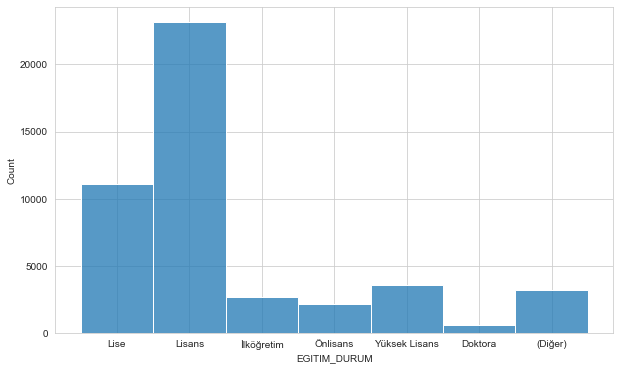

In [57]:
sns.histplot(data=df1, x="EGITIM_DURUM");

In [51]:
df[df.MART_ODENEN_TUTAR == 0]

,POLICY_ID,OFFICE_ID,SIGORTA_TIP,SOZLESME_KOKENI,SOZLESME_KOKENI_DETAY,BASLANGIC_TARIHI,KAPSAM_TIPI,KAPSAM_GRUBU,DAGITIM_KANALI,POLICE_SEHIR,DOGUM_TARIHI,CINSIYET,UYRUK,MEMLEKET,MESLEK,MESLEK_KIRILIM,MUSTERI_SEGMENTI,YATIRIM_KARAKTERI,MEDENI_HAL,EGITIM_DURUM,GELIR,COCUK_SAYISI,OCAK_ODENEN_TUTAR,OCAK_VADE_TUTARI,SUBAT_ODENEN_TU,SUBAT_VADE_TUTARI,MART_ODENEN_TUTAR,MART_VADE_TUTARI,NISAN_ODENEN_TUTAR,NISAN_VADE_TUTARI,MAYIS_ODENEN_TUTAR,MAYIS_VADE_TUTARI,HAZIRAN_ODENEN_TUTAR,HAZIRAN_VADE_TUTARI,TEMMUZ_ODENEN_TUTAR,TEMMUZ_VADE_TUTARI,AGUSTOS_ODENEN_TUTAR,AGUSTOS_VADE_TUTARI,EYLUL_ODENEN_TUTAR,EYLUL_VADE_TUTARI,EKIM_ODENEN_TUTAR,EKIM_VADE_TUTARI,KASIM_ODENEN_TUTAR,KASIM_VADE_TUTARI,ARALIK_ODENEN_TUTAR,ARALIK_VADE_TUTARI,SENE_BASI_HESAP_DEGERI,SENE_SONU_HESAP_DEGERI,ARTIS_DURUMU
6,8167943,10006,8,NEW,NEW,2018-12,PENSION329,OKS,Kanal4 + Kanal2,İSTANBUL,1993,1,TR,1,NaN,NaN,102.000,NaN,Single,NaN,NaN,0.000,0,120,0,120,0,120,0,120,0,120,0,120,0,120,0,120,0,120,0,120,0,120,0,120,407,462,0
9,1127870,10230,6,NEW,NEW,2016-02,PENSION028,STD GRUP,Kanal4 + Kanal2,ANKARA,1993,1,TR,1,SEKT032,OCCU006,106.000,NaN,Single,Lise,0,0.000,0,97,0,97,0,97,0,97,0,97,0,97,0,97,0,97,0,97,0,97,0,97,0,97,501,519,0
10,8216966,10232,7,NEW,NEW,2015-08,PENSION223,GRUP,Kanal4 + Kanal2,BALIKESİR,1987,2,TR,1,SEKT032,OCCU006,103.000,NaN,Married,NaN,1500,0.000,0,60,0,60,0,60,0,60,0,60,0,60,0,60,0,60,0,60,0,60,0,60,0,60,127,142,0
13,8691355,10129,1,NEW,NEW,2006-03,PENSION056,EV HANIMI,Kanal4 + Kanal2,İZMİR,1981,2,TR,1,SEKT010,OCCU037,106.000,NaN,Married,Lise,0,0.000,0,130,0,130,0,130,0,130,0,130,0,130,0,130,0,130,0,130,0,130,0,130,0,130,0,0,1
21,1075630,10375,6,NEW,NEW,2011-06,PENSION126,STD GRUP,Kanal4 + Kanal2,ANKARA,1974,1,TR,1,SEKT032,OCCU013,106.000,NaN,Single,Lisans,10000,0.000,0,97,0,97,0,97,0,97,0,97,0,97,0,97,0,97,0,97,0,97,0,97,0,97,1045,1280,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634105,9822641,11274,1,NEW,NEW,2009-04,PENSION001,GRUPLANMAMIŞ,Kanal4 + Kanal2,İSTANBUL,1977,1,TR,1,SEKT032,OCCU074,106.000,NaN,Married,NaN,1500,0.000,0,340,0,340,0,340,0,340,0,340,0,340,0,340,0,340,0,340,0,340,0,340,0,340,142,152,0
634106,8588248,10029,1,NEW,NEW,2012-12,PENSION001,GRUPLANMAMIŞ,Kanal1 + Kanal2,MANİSA,1952,1,TR,1,SEKT032,OCCU004,106.000,NaN,Single,Lise,2000,0.000,0,340,0,340,0,340,0,340,0,340,0,340,0,340,0,340,0,340,0,340,0,340,0,340,3355,4126,0
634109,4285594,11422,1,NEW,NEW,2013-03,PENSION195,GRUPLANMAMIŞ,Kanal4 + Kanal2,TRABZON,1966,2,TR,1,SEKT032,OCCU037,103.000,NaN,Married,Lise,3000,0.000,0,287,0,287,0,287,0,287,0,287,0,287,0,287,0,287,0,287,0,287,0,287,0,287,20958,23038,0
634110,5443282,10348,1,NEW,NEW,2014-05,PENSION215,GRUPLANMAMIŞ,Kanal4 + Kanal2,MERSİN,1988,2,TR,1,SEKT032,OCCU074,106.000,NaN,Single,NaN,2000,0.000,0,170,0,170,0,170,0,170,0,170,0,170,0,170,0,170,0,170,0,170,0,170,0,170,122,133,0


## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Other</p>

In [66]:
df[df.POLICY_ID == 585359]

,POLICY_ID,OFFICE_ID,SIGORTA_TIP,SOZLESME_KOKENI,SOZLESME_KOKENI_DETAY,BASLANGIC_TARIHI,KAPSAM_TIPI,KAPSAM_GRUBU,DAGITIM_KANALI,POLICE_SEHIR,DOGUM_TARIHI,CINSIYET,UYRUK,MEMLEKET,MESLEK,MESLEK_KIRILIM,MUSTERI_SEGMENTI,YATIRIM_KARAKTERI,MEDENI_HAL,EGITIM_DURUM,GELIR,COCUK_SAYISI,OCAK_ODENEN_TUTAR,OCAK_VADE_TUTARI,SUBAT_ODENEN_TU,SUBAT_VADE_TUTARI,MART_ODENEN_TUTAR,MART_VADE_TUTARI,NISAN_ODENEN_TUTAR,NISAN_VADE_TUTARI,MAYIS_ODENEN_TUTAR,MAYIS_VADE_TUTARI,HAZIRAN_ODENEN_TUTAR,HAZIRAN_VADE_TUTARI,TEMMUZ_ODENEN_TUTAR,TEMMUZ_VADE_TUTARI,AGUSTOS_ODENEN_TUTAR,AGUSTOS_VADE_TUTARI,EYLUL_ODENEN_TUTAR,EYLUL_VADE_TUTARI,EKIM_ODENEN_TUTAR,EKIM_VADE_TUTARI,KASIM_ODENEN_TUTAR,KASIM_VADE_TUTARI,ARALIK_ODENEN_TUTAR,ARALIK_VADE_TUTARI,SENE_BASI_HESAP_DEGERI,SENE_SONU_HESAP_DEGERI,ARTIS_DURUMU


In [ ]:
df.loc[]

In [ ]:
sns.histplot(x = df[df.ARTIS_DURUMU == 1]["GELIR"], data=df);

In [ ]:
df[df.ARTIS_DURUMU == 1][["YATIRIM_KARAKTERI","SENE_BASI_HESAP_DEGERI", "SENE_SONU_HESAP_DEGERI"]]

In [ ]:
df[(df.ARTIS_DURUMU == 1) & (df.OCAK_ODENEN_TUTAR != df.OCAK_VADE_TUTARI)]

In [ ]:
len(df[(df.ARTIS_DURUMU == 1) & (df.SENE_BASI_HESAP_DEGERI == 0) & (df.SENE_SONU_HESAP_DEGERI == 0)])

In [ ]:
df[(df.ARTIS_DURUMU == 1) & (df.SENE_BASI_HESAP_DEGERI == 0) & (df.SENE_SONU_HESAP_DEGERI == 0)]

In [ ]:
df.EGITIM_DURUM.sample(10)

In [ ]:
df.EGITIM_DURUM.value_counts()

In [ ]:
df.EGITIM_DURUM.unique()

In [ ]:
df[df.EGITIM_DURUM.isnull()]

In [ ]:
df[df.EGITIM_DURUM.isnull()]["ARTIS_DURUMU"].value_counts()

In [ ]:
df.columns

In [ ]:
sns.histplot(x="EGITIM_DURUM", data=df, bins=100);

In [ ]:
df.groupby("SIGORTA_TIP")["EGITIM_DURUM"].value_counts()